# Handwritten Digit Recognition

# Step 1: Load the Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
data_df = pd.read_csv("data.csv")
test_df = pd.read_csv("test.csv")

# Display first few rows of the datasets
print(data_df.head())
print(test_df.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

# Step 2: Prepare Data

In [7]:
# Separate features and labels
y = data_df['label']
x = data_df.drop('label', axis=1)

# Prepare test data
x_for_test_data = test_df[:]


# Step 3: Visualize Data

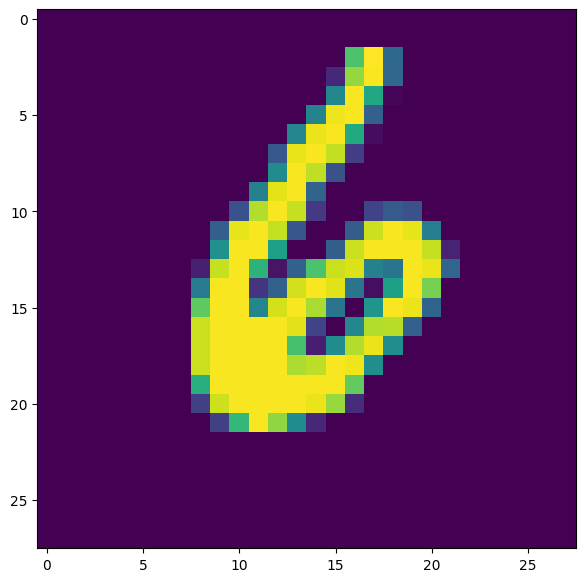

Label: 6


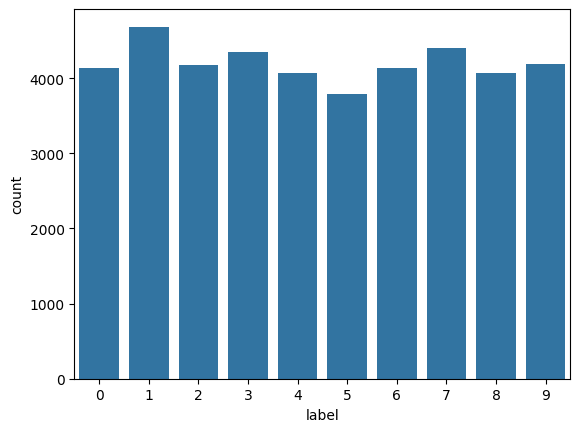

In [8]:
# Visualize a sample image from the dataset
plt.figure(figsize=(7,7))
some_digit = 1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
plt.show()
print("Label:", y[some_digit])

# Countplot of labels
sns.countplot(x='label', data=data_df)
plt.show()


# Step 4: Define Function to Train and Evaluate Model

In [29]:
def evaluate_knn(x, y, test_size, k_values):
    results = []
    for k in k_values:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=40)
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)
        
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(x_train, y_train)
        
        y_pred = classifier.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        results.append((k, test_size, accuracy, conf_matrix))
        
        print(f"K={k}, Test Size={test_size}")
        print("Accuracy:", accuracy)
        print("Confusion Matrix:\n", conf_matrix) 
        print("\n")

        
    
    return results


# Step 5: Execute Function for One Scenario (75:25 split, K=5)

In [10]:
# k_values = [2, 4, 5, 6, 7, 10]
# test_size = 0.25  # 75:25 split

# # Evaluating KNN for specified scenario
# results = evaluate_knn(x, y, test_size, k_values)


# Step 6: Document Results for All Scenarios

In [11]:
# Define all train-test splits
test_sizes = [0.40, 0.30, 0.25, 0.20, 0.10, 0.05]

# Define K values
k_values = [2, 4, 5, 6, 7, 10]

# Evaluate KNN for all scenarios
all_results = []
for test_size in test_sizes:
    results = evaluate_knn(x, y, test_size, k_values)
    all_results.extend(results)

# Save results to a DataFrame
results_df = pd.DataFrame(all_results, columns=["K", "Test_Size", "Accuracy", "Confusion_Matrix"])

# Save the results to a CSV file
results_df.to_csv("knn_evaluation_results.csv", index=False)


K=2, Test Size=0.4
Accuracy: 0.9167857142857143
Confusion Matrix:
 [[1596    0    3    3    2    5    7    0    0    1]
 [   1 1863    3    0    0    1    0    0    2    1]
 [  27   28 1596   22    7    2    9   12    7    3]
 [   8   11   56 1679    2   22    1    9   11    4]
 [   2   35   20    3 1535    3    4   12    2   26]
 [  13    5    6  100    9 1340   19    7    5    2]
 [  42    4   16    1    6   24 1518    0    1    0]
 [   3   29   19   17   31    1    0 1616    1   35]
 [  18   25   32   71   29  105    6   11 1275   16]
 [  10   12    9   25   95   13    0  137   11 1384]]


K=4, Test Size=0.4
Accuracy: 0.9288095238095239
Confusion Matrix:
 [[1587    0    2    4    0    6   13    2    1    2]
 [   1 1860    3    0    0    1    3    1    1    1]
 [  18   30 1593   21    9    1   12   15    9    5]
 [   5   10   29 1682    1   27    2   18   19   10]
 [   1   34   14    4 1525    6    4    8    2   44]
 [  14    6    5   77    7 1351   25    6    7    8]
 [  29    4   1

# Step 7 : Load and Review the Results

In [15]:
import pandas as pd

# Load the results from the CSV file
results_df = pd.read_csv("knn_evaluation_results.csv")

# Display the first few rows of the results
print(results_df.head())


     K  Test_Size  Accuracy                                   Confusion_Matrix
0    2       0.40  0.916786  [[1596    0    3    3    2    5    7    0    0...
1    4       0.40  0.928810  [[1587    0    2    4    0    6   13    2    1...
2    5       0.40  0.929821  [[1582    2    3    3    0    8   13    2    2...
3    6       0.40  0.927262  [[1584    0    3    3    0    8   14    2    1...
4    7       0.40  0.927381  [[1580    2    3    4    1    7   14    2    2...
5   10       0.40  0.925000  [[1585    1    2    3    2    7   13    3    1...
6    2       0.30  0.921032  [[1217    0    2    4    1    4    7    0    0...
7    4       0.30  0.931508  [[1214    0    2    1    0    5   10    2    0...
8    5       0.30  0.932063  [[1207    0    3    3    0    6   12    2    1...
9    6       0.30  0.930159  [[1206    0    3    2    0    8   13    2    0...
10   7       0.30  0.928889  [[1206    0    3    2    0    6   13    2    2...
11  10       0.30  0.928095  [[1209    0    2    2  

# Step 8: Plot Accuracy for Different K Values

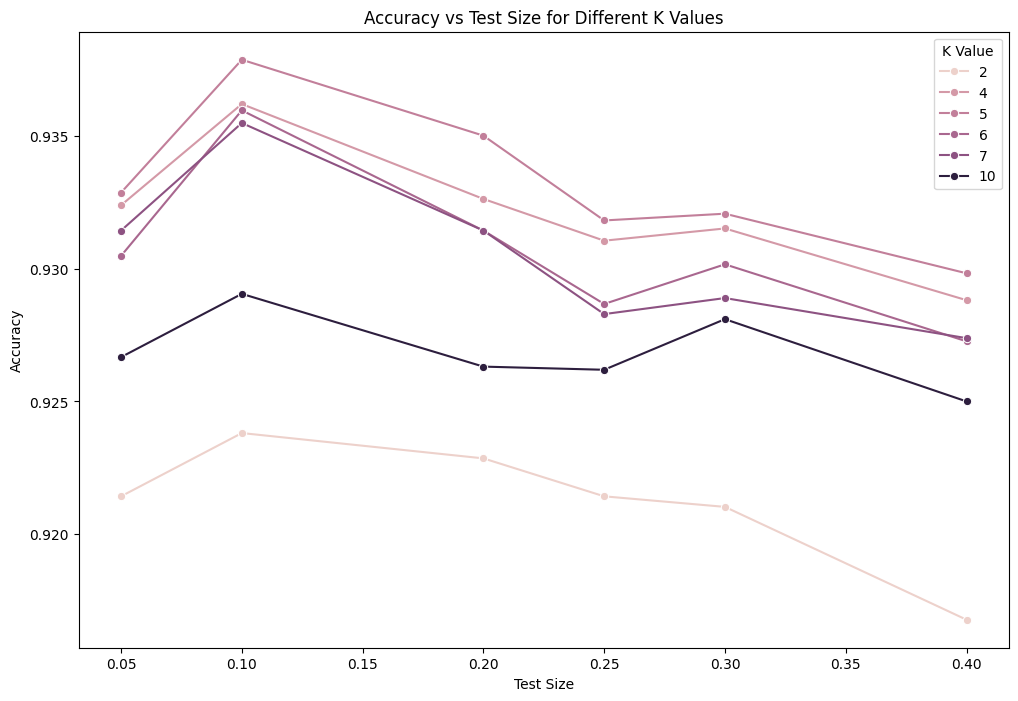

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=results_df, x='Test_Size', y='Accuracy', hue='K', marker='o')
plt.title('Accuracy vs Test Size for Different K Values')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend(title='K Value')
plt.show()


# Step 9: Confusion Matrix Analysis

K: 2
Test-Split 0.4
Original Confusion Matrix String:
[[1596    0    3    3    2    5    7    0    0    1]
 [   1 1863    3    0    0    1    0    0    2    1]
 [  27   28 1596   22    7    2    9   12    7    3]
 [   8   11   56 1679    2   22    1    9   11    4]
 [   2   35   20    3 1535    3    4   12    2   26]
 [  13    5    6  100    9 1340   19    7    5    2]
 [  42    4   16    1    6   24 1518    0    1    0]
 [   3   29   19   17   31    1    0 1616    1   35]
 [  18   25   32   71   29  105    6   11 1275   16]
 [  10   12    9   25   95   13    0  137   11 1384]]
Cleaned Confusion Matrix String:
[[1596,0,3,3,2,5,7,0,0,1],[1,1863,3,0,0,1,0,0,2,1],[27,28,1596,22,7,2,9,12,7,3],[8,11,56,1679,2,22,1,9,11,4],[2,35,20,3,1535,3,4,12,2,26],[13,5,6,100,9,1340,19,7,5,2],[42,4,16,1,6,24,1518,0,1,0],[3,29,19,17,31,1,0,1616,1,35],[18,25,32,71,29,105,6,11,1275,16],[10,12,9,25,95,13,0,137,11,1384]]


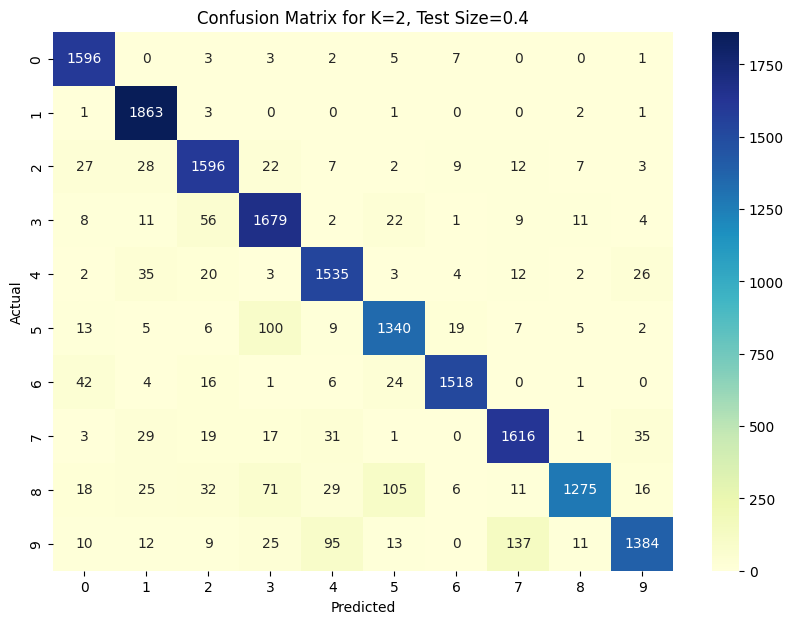

K: 4
Test-Split 0.4
Original Confusion Matrix String:
[[1587    0    2    4    0    6   13    2    1    2]
 [   1 1860    3    0    0    1    3    1    1    1]
 [  18   30 1593   21    9    1   12   15    9    5]
 [   5   10   29 1682    1   27    2   18   19   10]
 [   1   34   14    4 1525    6    4    8    2   44]
 [  14    6    5   77    7 1351   25    6    7    8]
 [  29    4   12    3    5   13 1545    0    1    0]
 [   1   29   11    8   27    0    0 1619    1   56]
 [  14   22   18   41   20   76    4    8 1362   23]
 [  13    6    8   20   59    6    0   92   12 1480]]
Cleaned Confusion Matrix String:
[[1587,0,2,4,0,6,13,2,1,2],[1,1860,3,0,0,1,3,1,1,1],[18,30,1593,21,9,1,12,15,9,5],[5,10,29,1682,1,27,2,18,19,10],[1,34,14,4,1525,6,4,8,2,44],[14,6,5,77,7,1351,25,6,7,8],[29,4,12,3,5,13,1545,0,1,0],[1,29,11,8,27,0,0,1619,1,56],[14,22,18,41,20,76,4,8,1362,23],[13,6,8,20,59,6,0,92,12,1480]]


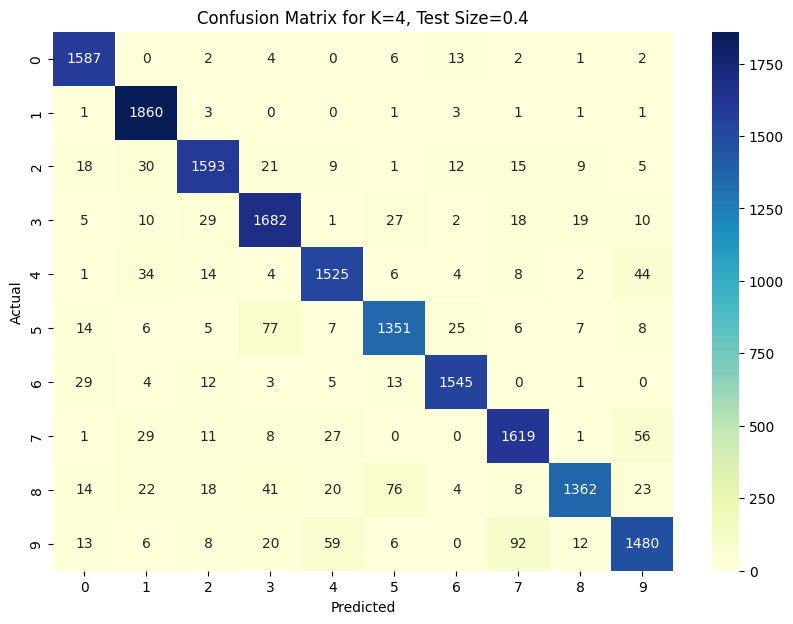

K: 5
Test-Split 0.4
Original Confusion Matrix String:
[[1582    2    3    3    0    8   13    2    2    2]
 [   0 1857    3    0    0    1    4    1    2    3]
 [  16   28 1577   32   11    1   13   16   13    6]
 [   5   10   25 1681    2   33    3   18   18    8]
 [   1   32   13    4 1513    5    3    7    4   60]
 [  11    7    4   65    8 1358   31    5    8    9]
 [  24    3   12    2    6   15 1550    0    0    0]
 [   2   28    8    6   30    0    0 1601    1   76]
 [  13   19   18   38   17   64    5    9 1382   23]
 [  11    7    8   19   45    6    0   68   12 1520]]
Cleaned Confusion Matrix String:
[[1582,2,3,3,0,8,13,2,2,2],[0,1857,3,0,0,1,4,1,2,3],[16,28,1577,32,11,1,13,16,13,6],[5,10,25,1681,2,33,3,18,18,8],[1,32,13,4,1513,5,3,7,4,60],[11,7,4,65,8,1358,31,5,8,9],[24,3,12,2,6,15,1550,0,0,0],[2,28,8,6,30,0,0,1601,1,76],[13,19,18,38,17,64,5,9,1382,23],[11,7,8,19,45,6,0,68,12,1520]]


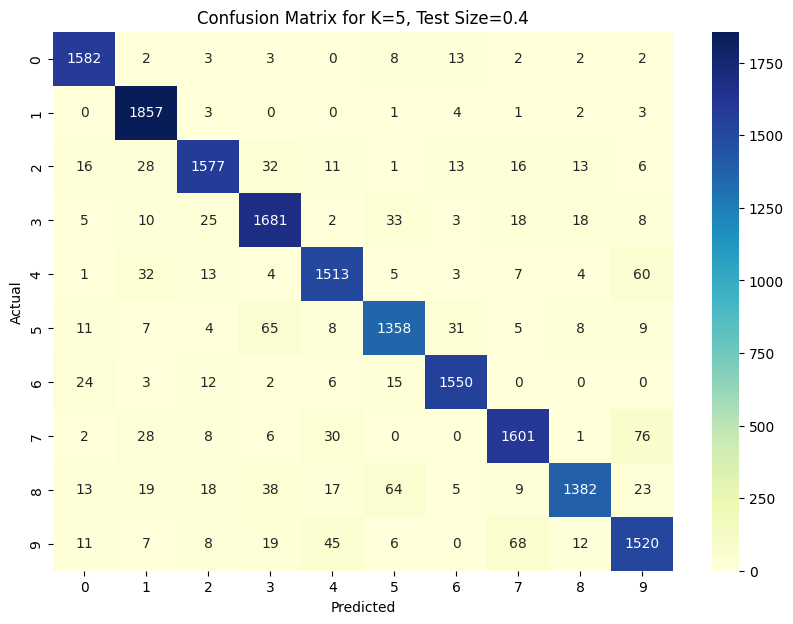

K: 6
Test-Split 0.4
Original Confusion Matrix String:
[[1584    0    3    3    0    8   14    2    1    2]
 [   0 1858    2    0    0    1    4    2    2    2]
 [  22   29 1576   30    8    1   14   15   11    7]
 [   7    9   29 1676    2   30    3   17   22    8]
 [   1   35   15    4 1513    8    4    5    3   54]
 [  12    9    3   70    8 1360   28    4    6    6]
 [  31    3   12    3    5   14 1542    0    2    0]
 [   1   35    7    7   26    0    0 1609    1   66]
 [  16   22   16   43   20   72    7    8 1362   22]
 [  11    9    7   24   50    4    0   83   10 1498]]
Cleaned Confusion Matrix String:
[[1584,0,3,3,0,8,14,2,1,2],[0,1858,2,0,0,1,4,2,2,2],[22,29,1576,30,8,1,14,15,11,7],[7,9,29,1676,2,30,3,17,22,8],[1,35,15,4,1513,8,4,5,3,54],[12,9,3,70,8,1360,28,4,6,6],[31,3,12,3,5,14,1542,0,2,0],[1,35,7,7,26,0,0,1609,1,66],[16,22,16,43,20,72,7,8,1362,22],[11,9,7,24,50,4,0,83,10,1498]]


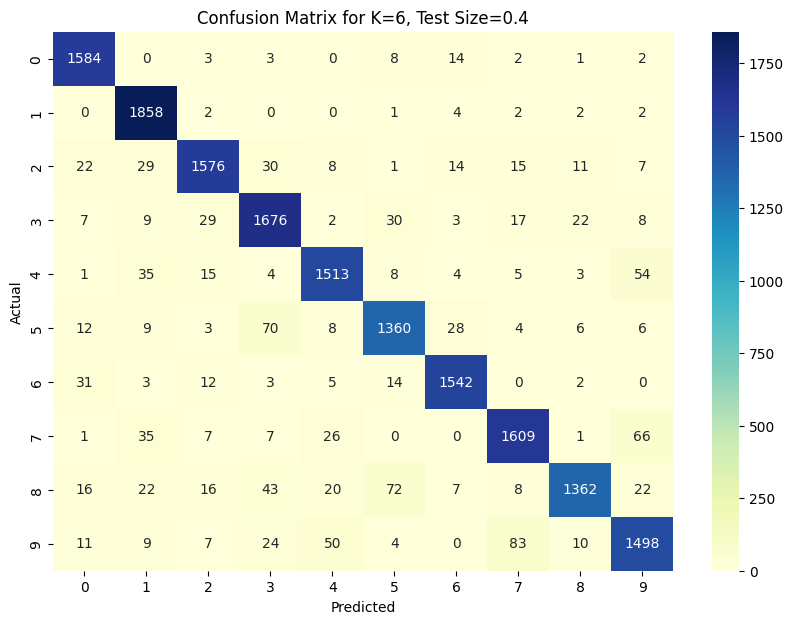

K: 7
Test-Split 0.4
Original Confusion Matrix String:
[[1580    2    3    4    1    7   14    2    2    2]
 [   0 1856    2    0    0    1    6    1    2    3]
 [  17   32 1567   35   12    1   14   17   13    5]
 [   6   10   18 1683    2   30    3   19   23    9]
 [   1   31   14    5 1504    8    6    6    3   64]
 [   9   11    3   62    8 1360   31    4    9    9]
 [  20    3   10    2    6   17 1552    0    2    0]
 [   1   33    7    7   24    0    0 1597    1   82]
 [  15   22   17   42   17   71    5    9 1366   24]
 [  12   10    6   23   43    6    0   73    8 1515]]
Cleaned Confusion Matrix String:
[[1580,2,3,4,1,7,14,2,2,2],[0,1856,2,0,0,1,6,1,2,3],[17,32,1567,35,12,1,14,17,13,5],[6,10,18,1683,2,30,3,19,23,9],[1,31,14,5,1504,8,6,6,3,64],[9,11,3,62,8,1360,31,4,9,9],[20,3,10,2,6,17,1552,0,2,0],[1,33,7,7,24,0,0,1597,1,82],[15,22,17,42,17,71,5,9,1366,24],[12,10,6,23,43,6,0,73,8,1515]]


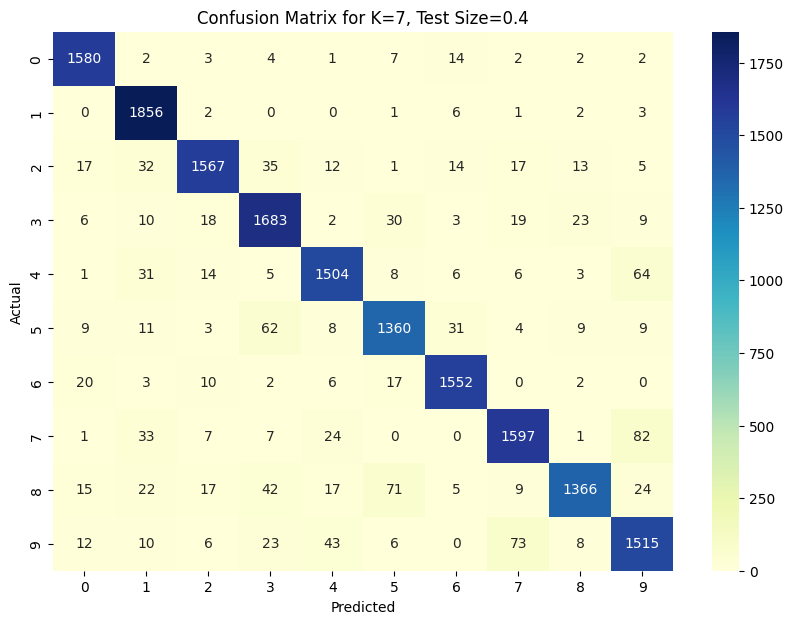

K: 10
Test-Split 0.4
Original Confusion Matrix String:
[[1585    1    2    3    2    7   13    3    1    0]
 [   0 1856    2    0    0    2    6    1    1    3]
 [  18   39 1563   31   12    0   15   16   12    7]
 [   3   14   24 1669    2   28    3   21   29   10]
 [   1   36   16    3 1498   12    7    5    1   63]
 [  10   11    4   58    8 1360   34    3    7   11]
 [  28    3    8    3    4   18 1545    0    3    0]
 [   1   36    7    4   24    0    0 1600    1   79]
 [  18   26   14   40   18   72    8    9 1360   23]
 [  10   12    7   24   42    5    0   81   11 1504]]
Cleaned Confusion Matrix String:
[[1585,1,2,3,2,7,13,3,1,0],[0,1856,2,0,0,2,6,1,1,3],[18,39,1563,31,12,0,15,16,12,7],[3,14,24,1669,2,28,3,21,29,10],[1,36,16,3,1498,12,7,5,1,63],[10,11,4,58,8,1360,34,3,7,11],[28,3,8,3,4,18,1545,0,3,0],[1,36,7,4,24,0,0,1600,1,79],[18,26,14,40,18,72,8,9,1360,23],[10,12,7,24,42,5,0,81,11,1504]]


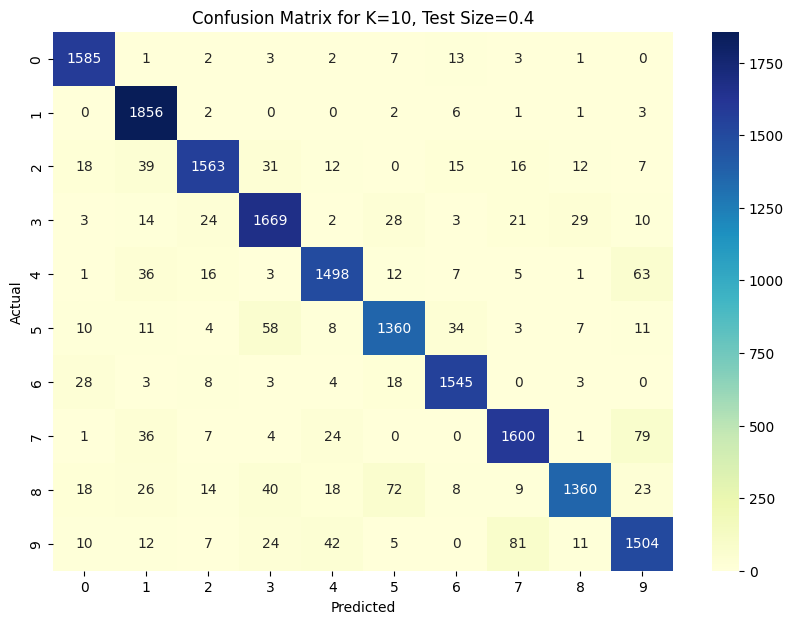

K: 2
Test-Split 0.3
Original Confusion Matrix String:
[[1217    0    2    4    1    4    7    0    0    1]
 [   0 1363    3    0    0    1    1    1    1    0]
 [  15   20 1171   18    6    2    5    8    5    2]
 [   4    6   37 1283    1   18    1    8    8    3]
 [   1   21   17    4 1132    3    3   10    2   22]
 [   7    4    3   72    6 1016   12    6    3    3]
 [  31    2   11    1    5   15 1151    0    0    0]
 [   3   21   13   10   19    1    0 1229    1   29]
 [  12   14   18   51   19   83    4    6  980   10]
 [   9    7    7   18   66    9    0   99    9 1063]]
Cleaned Confusion Matrix String:
[[1217,0,2,4,1,4,7,0,0,1],[0,1363,3,0,0,1,1,1,1,0],[15,20,1171,18,6,2,5,8,5,2],[4,6,37,1283,1,18,1,8,8,3],[1,21,17,4,1132,3,3,10,2,22],[7,4,3,72,6,1016,12,6,3,3],[31,2,11,1,5,15,1151,0,0,0],[3,21,13,10,19,1,0,1229,1,29],[12,14,18,51,19,83,4,6,980,10],[9,7,7,18,66,9,0,99,9,1063]]


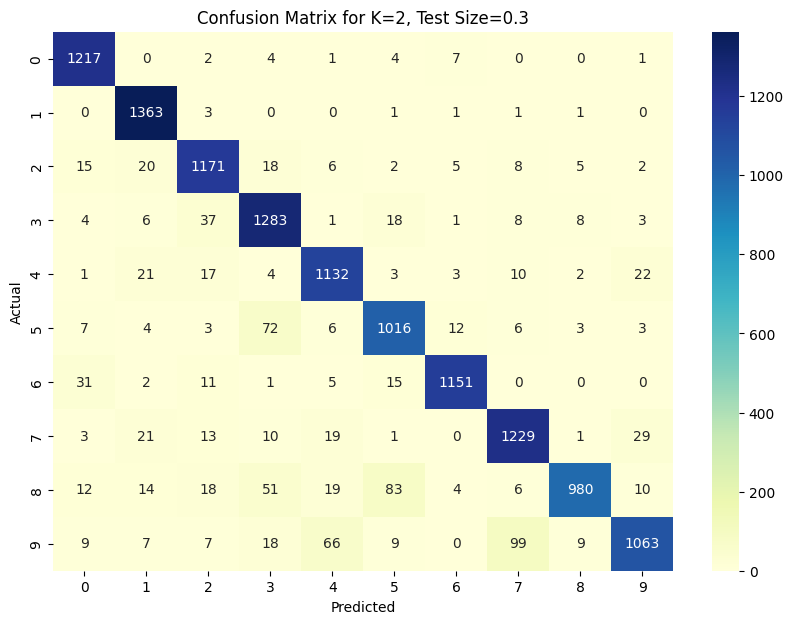

K: 4
Test-Split 0.3
Original Confusion Matrix String:
[[1214    0    2    1    0    5   10    2    0    2]
 [   0 1361    3    0    0    1    2    1    1    1]
 [  10   17 1165   18    5    1    8   13    8    7]
 [   2    7   23 1280    0   17    2   16   16    6]
 [   0   21   14    4 1128    3    3    7    0   35]
 [   7    3    2   52    7 1026   19    5    5    6]
 [  25    3    7    3    3    8 1165    0    2    0]
 [   1   19    9    6   17    0    0 1229    1   44]
 [   8   10   13   30   16   60    4    4 1037   15]
 [   9    5    6   14   44    4    0   64    9 1132]]
Cleaned Confusion Matrix String:
[[1214,0,2,1,0,5,10,2,0,2],[0,1361,3,0,0,1,2,1,1,1],[10,17,1165,18,5,1,8,13,8,7],[2,7,23,1280,0,17,2,16,16,6],[0,21,14,4,1128,3,3,7,0,35],[7,3,2,52,7,1026,19,5,5,6],[25,3,7,3,3,8,1165,0,2,0],[1,19,9,6,17,0,0,1229,1,44],[8,10,13,30,16,60,4,4,1037,15],[9,5,6,14,44,4,0,64,9,1132]]


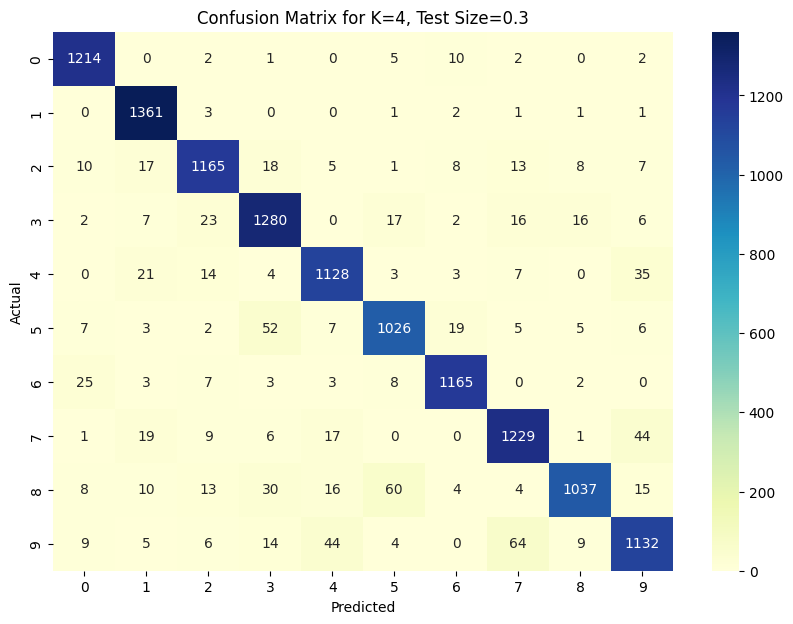

K: 5
Test-Split 0.3
Original Confusion Matrix String:
[[1207    0    3    3    0    6   12    2    1    2]
 [   0 1359    3    0    0    1    2    1    2    2]
 [   9   18 1162   21    5    0    9   12    9    7]
 [   2    6   19 1280    0   21    2   17   16    6]
 [   0   20   14    3 1122    2    2    6    2   44]
 [   8    6    2   44    6 1027   22    4    6    7]
 [  19    3    6    2    5   10 1171    0    0    0]
 [   1   20    9    5   17    0    0 1213    1   60]
 [   6    9   12   24   15   54    4    5 1051   17]
 [   9    4    6   15   30    6    0   55   10 1152]]
Cleaned Confusion Matrix String:
[[1207,0,3,3,0,6,12,2,1,2],[0,1359,3,0,0,1,2,1,2,2],[9,18,1162,21,5,0,9,12,9,7],[2,6,19,1280,0,21,2,17,16,6],[0,20,14,3,1122,2,2,6,2,44],[8,6,2,44,6,1027,22,4,6,7],[19,3,6,2,5,10,1171,0,0,0],[1,20,9,5,17,0,0,1213,1,60],[6,9,12,24,15,54,4,5,1051,17],[9,4,6,15,30,6,0,55,10,1152]]


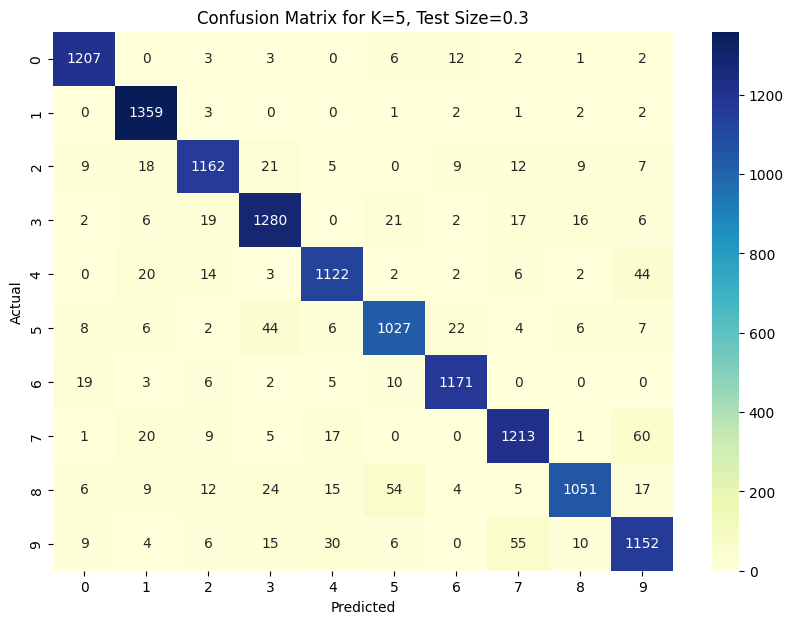

K: 6
Test-Split 0.3
Original Confusion Matrix String:
[[1206    0    3    2    0    8   13    2    0    2]
 [   0 1361    2    0    1    1    2    1    1    1]
 [  10   20 1157   23    5    1   10   13    8    5]
 [   3    5   20 1280    0   22    2   17   15    5]
 [   0   21   14    3 1123    5    2    6    2   39]
 [   8    5    2   47    6 1031   18    4    5    6]
 [  22    3    8    3    4   10 1165    0    1    0]
 [   1   23    8    4   15    0    0 1220    1   54]
 [   9   11   11   27   16   56    4    4 1042   17]
 [  11    7    6   17   40    3    0   61    7 1135]]
Cleaned Confusion Matrix String:
[[1206,0,3,2,0,8,13,2,0,2],[0,1361,2,0,1,1,2,1,1,1],[10,20,1157,23,5,1,10,13,8,5],[3,5,20,1280,0,22,2,17,15,5],[0,21,14,3,1123,5,2,6,2,39],[8,5,2,47,6,1031,18,4,5,6],[22,3,8,3,4,10,1165,0,1,0],[1,23,8,4,15,0,0,1220,1,54],[9,11,11,27,16,56,4,4,1042,17],[11,7,6,17,40,3,0,61,7,1135]]


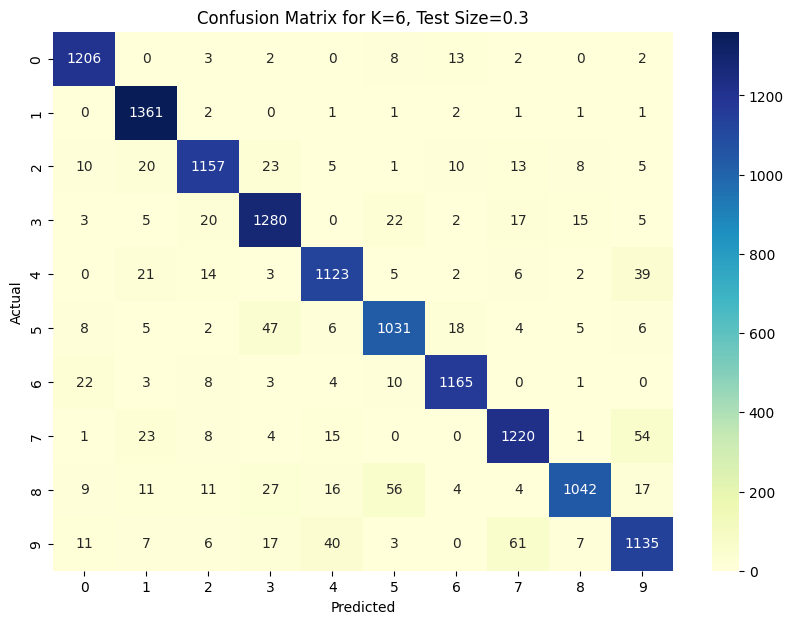

K: 7
Test-Split 0.3
Original Confusion Matrix String:
[[1206    0    3    2    0    6   13    2    2    2]
 [   0 1357    2    0    1    2    4    1    2    1]
 [  10   21 1148   29    4    1    9   14   10    6]
 [   4    8   15 1276    1   24    2   17   17    5]
 [   0   18   13    4 1114    6    3    7    2   48]
 [   7    8    2   42    5 1029   22    4    4    9]
 [  19    3    7    2    4    9 1170    0    2    0]
 [   2   23    6    4   17    0    0 1212    1   61]
 [   8   10   12   28   14   61    4    6 1037   17]
 [  11    6    5   17   28    4    0   54    7 1155]]
Cleaned Confusion Matrix String:
[[1206,0,3,2,0,6,13,2,2,2],[0,1357,2,0,1,2,4,1,2,1],[10,21,1148,29,4,1,9,14,10,6],[4,8,15,1276,1,24,2,17,17,5],[0,18,13,4,1114,6,3,7,2,48],[7,8,2,42,5,1029,22,4,4,9],[19,3,7,2,4,9,1170,0,2,0],[2,23,6,4,17,0,0,1212,1,61],[8,10,12,28,14,61,4,6,1037,17],[11,6,5,17,28,4,0,54,7,1155]]


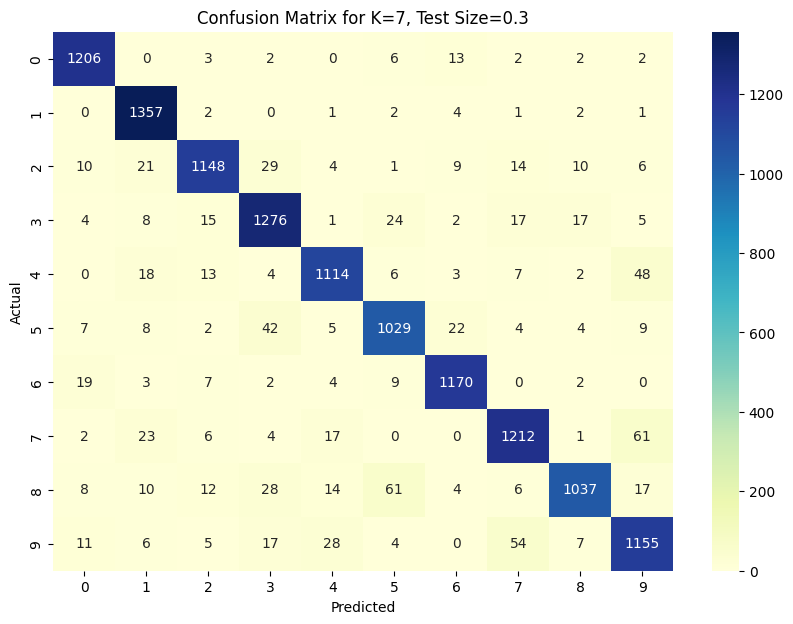

K: 10
Test-Split 0.3
Original Confusion Matrix String:
[[1209    0    2    2    1    6   13    2    0    1]
 [   0 1358    2    0    1    2    4    1    1    1]
 [   7   23 1152   26    7    0   10   12    9    6]
 [   2   10   18 1275    1   17    2   18   19    7]
 [   0   21   11    3 1113    7    5    7    1   47]
 [   7    8    2   48    5 1022   23    3    5    9]
 [  23    2    5    3    4   13 1164    0    2    0]
 [   1   25    9    3   13    0    0 1215    1   59]
 [   9   14   11   24   15   56    5    4 1039   20]
 [   9    8    5   16   29    5    0   61    7 1147]]
Cleaned Confusion Matrix String:
[[1209,0,2,2,1,6,13,2,0,1],[0,1358,2,0,1,2,4,1,1,1],[7,23,1152,26,7,0,10,12,9,6],[2,10,18,1275,1,17,2,18,19,7],[0,21,11,3,1113,7,5,7,1,47],[7,8,2,48,5,1022,23,3,5,9],[23,2,5,3,4,13,1164,0,2,0],[1,25,9,3,13,0,0,1215,1,59],[9,14,11,24,15,56,5,4,1039,20],[9,8,5,16,29,5,0,61,7,1147]]


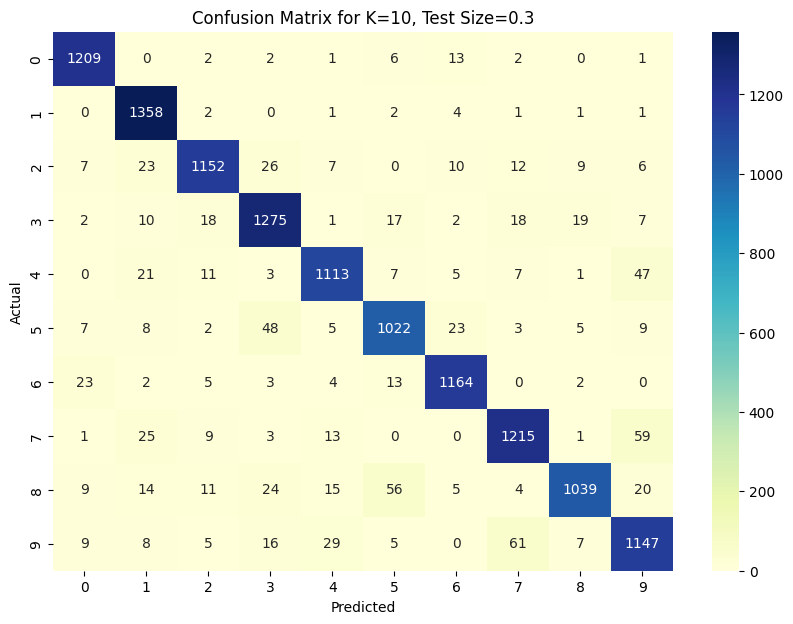

K: 2
Test-Split 0.25
Original Confusion Matrix String:
[[1006    0    2    4    1    3    5    0    0    1]
 [   0 1124    2    0    0    1    1    1    1    0]
 [  14   20  983   13    7    0    6    4    5    1]
 [   3    5   31 1056    1   17    1    5    6    3]
 [   1   20   15    2  941    2    3    8    2   20]
 [   4    3    2   60    6  835   14    6    2    2]
 [  26    2    8    1    3   12  956    0    0    0]
 [   3   18    7    6   10    1    0 1034    1   23]
 [  12   12   17   35   14   67    3    5  841    7]
 [   7    6    7   14   57   10    0   87    8  899]]
Cleaned Confusion Matrix String:
[[1006,0,2,4,1,3,5,0,0,1],[0,1124,2,0,0,1,1,1,1,0],[14,20,983,13,7,0,6,4,5,1],[3,5,31,1056,1,17,1,5,6,3],[1,20,15,2,941,2,3,8,2,20],[4,3,2,60,6,835,14,6,2,2],[26,2,8,1,3,12,956,0,0,0],[3,18,7,6,10,1,0,1034,1,23],[12,12,17,35,14,67,3,5,841,7],[7,6,7,14,57,10,0,87,8,899]]


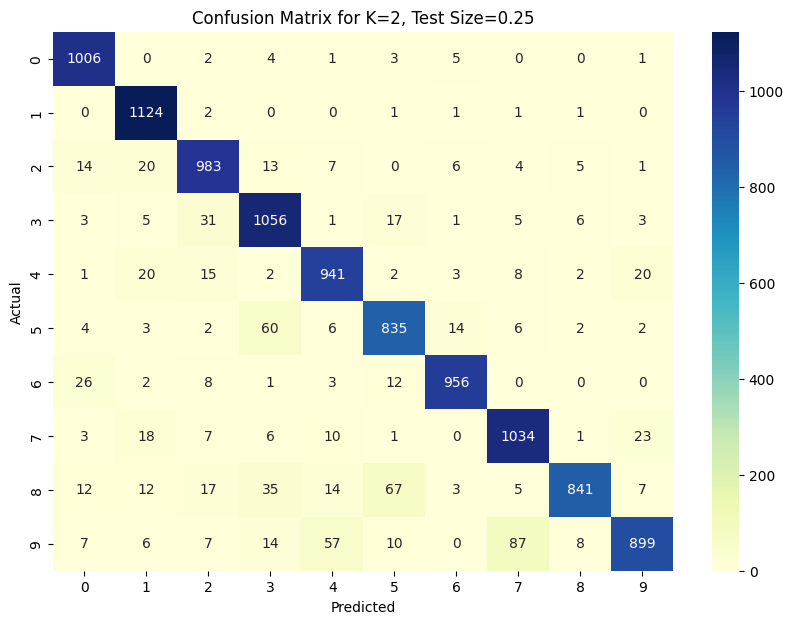

K: 4
Test-Split 0.25
Original Confusion Matrix String:
[[1003    0    2    1    0    4    8    2    0    2]
 [   0 1123    2    0    0    1    2    0    1    1]
 [  10   14  981   16    5    1    7    8    7    4]
 [   2    6   18 1051    0   17    2   13   13    6]
 [   0   20   11    2  938    3    3    6    1   30]
 [   4    3    1   43    6  840   22    5    4    6]
 [  20    3    3    3    2    8  968    0    1    0]
 [   1   15    6    2   10    0    0 1032    1   36]
 [   8    7   13   22   17   48    3    4  879   12]
 [   6    4    6   11   33    3    0   61   10  961]]
Cleaned Confusion Matrix String:
[[1003,0,2,1,0,4,8,2,0,2],[0,1123,2,0,0,1,2,0,1,1],[10,14,981,16,5,1,7,8,7,4],[2,6,18,1051,0,17,2,13,13,6],[0,20,11,2,938,3,3,6,1,30],[4,3,1,43,6,840,22,5,4,6],[20,3,3,3,2,8,968,0,1,0],[1,15,6,2,10,0,0,1032,1,36],[8,7,13,22,17,48,3,4,879,12],[6,4,6,11,33,3,0,61,10,961]]


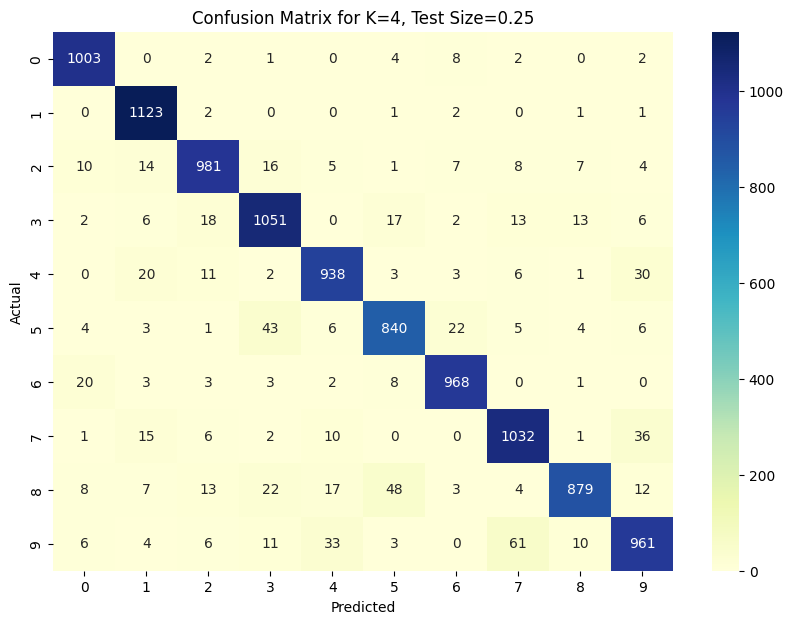

K: 5
Test-Split 0.25
Original Confusion Matrix String:
[[ 998    0    3    2    0    5    9    2    1    2]
 [   0 1123    2    0    0    1    2    1    1    0]
 [   8   15  978   17    5    1    7    9    8    5]
 [   2    7   14 1047    0   19    2   18   13    6]
 [   0   19   12    2  931    2    3    7    2   36]
 [   5    5    1   38    5  843   23    4    3    7]
 [  17    3    3    2    4    7  972    0    0    0]
 [   1   15    4    3   10    0    0 1024    1   45]
 [   6    7   11   19   13   47    4    4  889   13]
 [   8    4    6   13   23    4    0   50    8  979]]
Cleaned Confusion Matrix String:
[[998,0,3,2,0,5,9,2,1,2],[0,1123,2,0,0,1,2,1,1,0],[8,15,978,17,5,1,7,9,8,5],[2,7,14,1047,0,19,2,18,13,6],[0,19,12,2,931,2,3,7,2,36],[5,5,1,38,5,843,23,4,3,7],[17,3,3,2,4,7,972,0,0,0],[1,15,4,3,10,0,0,1024,1,45],[6,7,11,19,13,47,4,4,889,13],[8,4,6,13,23,4,0,50,8,979]]


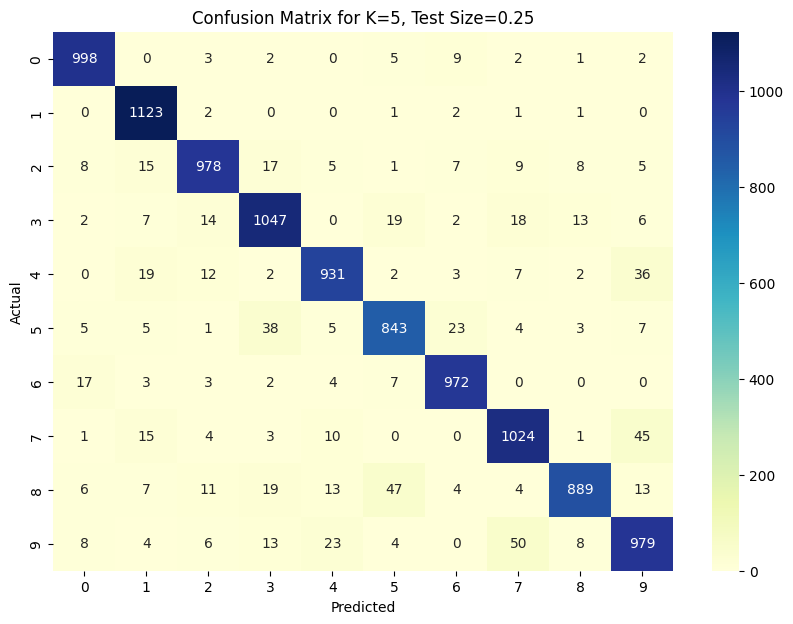

K: 6
Test-Split 0.25
Original Confusion Matrix String:
[[ 998    0    3    1    0    6   10    2    0    2]
 [   0 1123    2    0    0    1    2    1    1    0]
 [   7   18  976   19    4    1    9    8    7    4]
 [   3    4   15 1050    0   20    2   17   12    5]
 [   0   19   12    2  931    5    2    6    3   34]
 [   4    4    1   38    5  846   21    4    5    6]
 [  19    3    4    3    3    8  967    0    1    0]
 [   1   19    4    3   12    0    0 1023    1   40]
 [   9    9   10   21   14   49    4    3  879   15]
 [   9    6    6   13   33    4    0   59    7  958]]
Cleaned Confusion Matrix String:
[[998,0,3,1,0,6,10,2,0,2],[0,1123,2,0,0,1,2,1,1,0],[7,18,976,19,4,1,9,8,7,4],[3,4,15,1050,0,20,2,17,12,5],[0,19,12,2,931,5,2,6,3,34],[4,4,1,38,5,846,21,4,5,6],[19,3,4,3,3,8,967,0,1,0],[1,19,4,3,12,0,0,1023,1,40],[9,9,10,21,14,49,4,3,879,15],[9,6,6,13,33,4,0,59,7,958]]


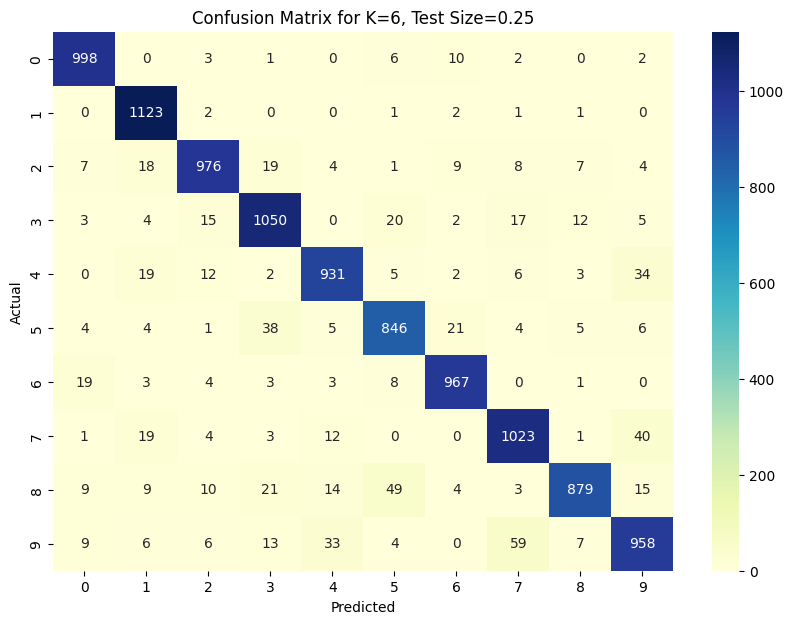

K: 7
Test-Split 0.25
Original Confusion Matrix String:
[[ 996    0    3    1    0    6   11    2    1    2]
 [   0 1120    2    0    1    2    3    0    1    1]
 [  10   18  970   22    4    0    9    7    9    4]
 [   4    5   13 1051    0   19    2   18   11    5]
 [   0   17   12    2  920    5    3    9    4   42]
 [   4    5    1   35    6  846   22    4    4    7]
 [  17    3    3    2    3    7  972    0    1    0]
 [   1   18    4    3   13    0    0 1017    1   46]
 [   8    9   10   19   13   53    6    4  877   14]
 [   9    6    6   14   23    3    0   50    6  978]]
Cleaned Confusion Matrix String:
[[996,0,3,1,0,6,11,2,1,2],[0,1120,2,0,1,2,3,0,1,1],[10,18,970,22,4,0,9,7,9,4],[4,5,13,1051,0,19,2,18,11,5],[0,17,12,2,920,5,3,9,4,42],[4,5,1,35,6,846,22,4,4,7],[17,3,3,2,3,7,972,0,1,0],[1,18,4,3,13,0,0,1017,1,46],[8,9,10,19,13,53,6,4,877,14],[9,6,6,14,23,3,0,50,6,978]]


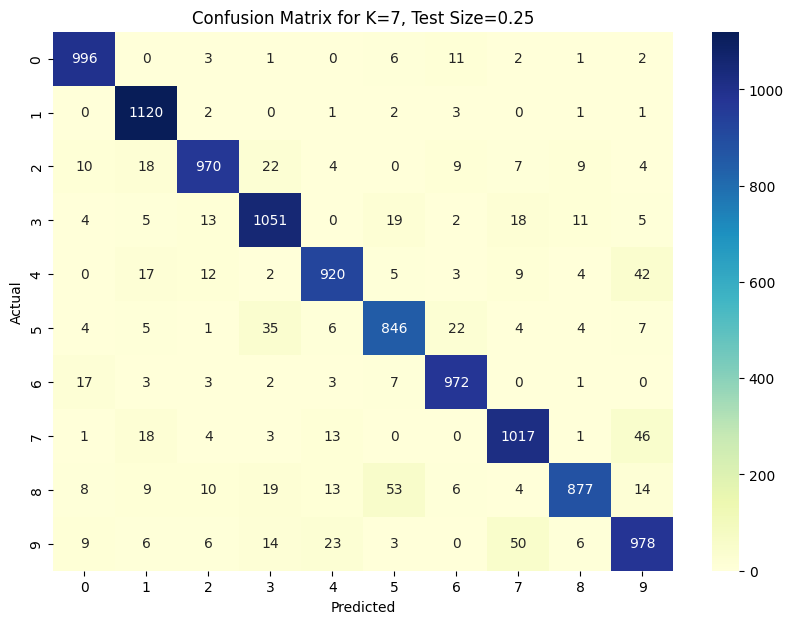

K: 10
Test-Split 0.25
Original Confusion Matrix String:
[[ 999    1    2    1    0    5   10    2    1    1]
 [   0 1120    2    0    1    2    3    0    1    1]
 [   7   21  968   23    6    0    9    7    9    3]
 [   2    9   16 1050    1   13    2   16   13    6]
 [   0   19   10    3  924    7    2    7    2   40]
 [   5    7    1   39    5  840   23    3    3    8]
 [  16    2    3    3    3   10  970    0    1    0]
 [   1   21    3    3   12    0    0 1016    1   46]
 [  11   12   10   22   14   48    5    4  871   16]
 [   8    8    5   14   27    3    0   55    8  967]]
Cleaned Confusion Matrix String:
[[999,1,2,1,0,5,10,2,1,1],[0,1120,2,0,1,2,3,0,1,1],[7,21,968,23,6,0,9,7,9,3],[2,9,16,1050,1,13,2,16,13,6],[0,19,10,3,924,7,2,7,2,40],[5,7,1,39,5,840,23,3,3,8],[16,2,3,3,3,10,970,0,1,0],[1,21,3,3,12,0,0,1016,1,46],[11,12,10,22,14,48,5,4,871,16],[8,8,5,14,27,3,0,55,8,967]]


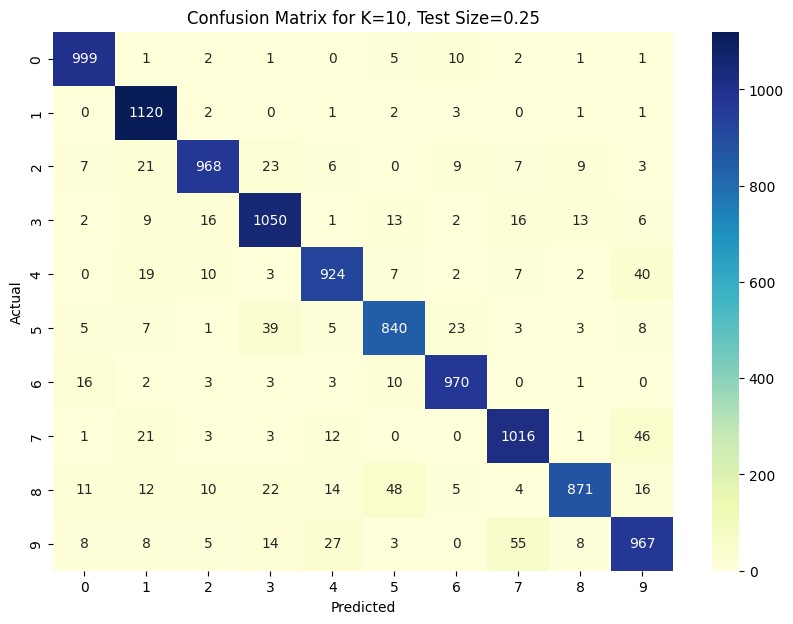

K: 2
Test-Split 0.2
Original Confusion Matrix String:
[[809   0   3   0   0   4   4   0   0   1]
 [  0 894   1   0   0   2   0   1   1   0]
 [ 12  14 803   8   7   0   5   4   4   1]
 [  3   5  25 854   0  14   1   4   5   2]
 [  1  16   9   2 732   2   2   7   1  19]
 [  5   3   1  45   4 684  12   5   2   1]
 [ 21   1   8   1   3   9 765   0   0   0]
 [  1  14   5   4   9   1   0 826   1  19]
 [  9   8  12  26  11  51   2   4 661   5]
 [  6   6   7  14  48   7   0  60   7 724]]
Cleaned Confusion Matrix String:
[[809,0,3,0,0,4,4,0,0,1],[0,894,1,0,0,2,0,1,1,0],[12,14,803,8,7,0,5,4,4,1],[3,5,25,854,0,14,1,4,5,2],[1,16,9,2,732,2,2,7,1,19],[5,3,1,45,4,684,12,5,2,1],[21,1,8,1,3,9,765,0,0,0],[1,14,5,4,9,1,0,826,1,19],[9,8,12,26,11,51,2,4,661,5],[6,6,7,14,48,7,0,60,7,724]]


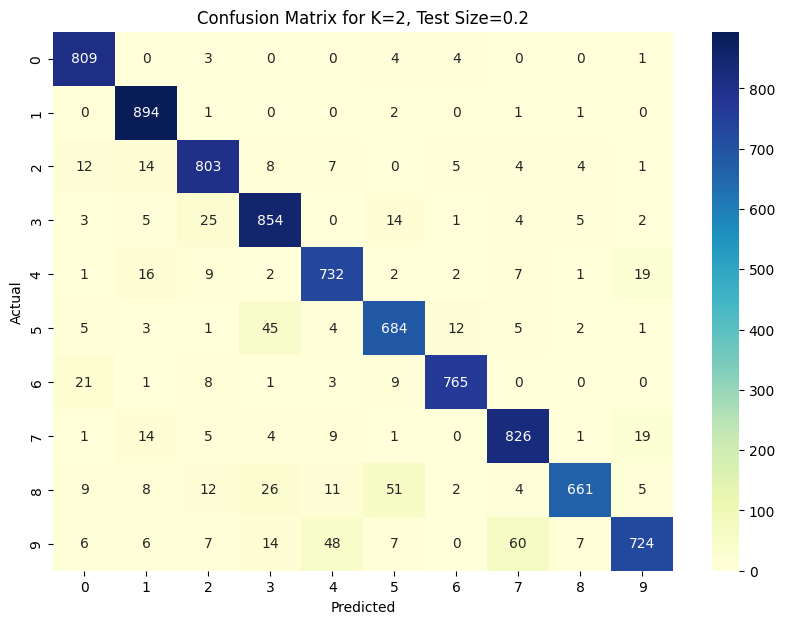

K: 4
Test-Split 0.2
Original Confusion Matrix String:
[[808   0   2   0   0   4   6   0   0   1]
 [  0 894   1   0   0   1   1   0   1   1]
 [  9  10 800  12   6   0   6   5   8   2]
 [  2   6  13 855   0  13   2   8  10   4]
 [  0  15   8   2 731   2   3   7   1  22]
 [  4   3   1  36   4 685  16   4   5   4]
 [ 17   1   4   2   2   7 774   0   1   0]
 [  0  11   3   2   8   0   0 825   1  30]
 [  6   5  11  16  11  39   2   3 689   7]
 [  6   3   6  10  30   3   0  42   6 773]]
Cleaned Confusion Matrix String:
[[808,0,2,0,0,4,6,0,0,1],[0,894,1,0,0,1,1,0,1,1],[9,10,800,12,6,0,6,5,8,2],[2,6,13,855,0,13,2,8,10,4],[0,15,8,2,731,2,3,7,1,22],[4,3,1,36,4,685,16,4,5,4],[17,1,4,2,2,7,774,0,1,0],[0,11,3,2,8,0,0,825,1,30],[6,5,11,16,11,39,2,3,689,7],[6,3,6,10,30,3,0,42,6,773]]


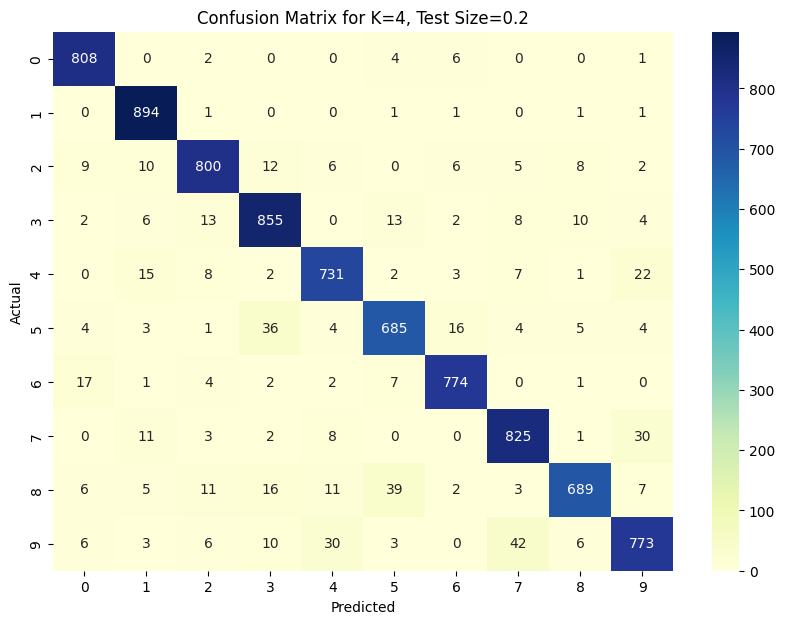

K: 5
Test-Split 0.2
Original Confusion Matrix String:
[[808   0   2   0   0   4   6   0   0   1]
 [  0 894   1   0   0   1   1   1   1   0]
 [  6  11 798  13   6   0   7   6   8   3]
 [  2   7  11 851   0  14   2  13  10   3]
 [  0  15   8   2 725   2   3   8   1  27]
 [  5   4   1  29   4 692  17   3   3   4]
 [ 15   1   3   2   3   5 779   0   0   0]
 [  0  11   2   3  10   0   0 819   1  34]
 [  5   6  10  11   8  34   3   3 701   8]
 [  8   3   6  12  19   3   0  35   6 787]]
Cleaned Confusion Matrix String:
[[808,0,2,0,0,4,6,0,0,1],[0,894,1,0,0,1,1,1,1,0],[6,11,798,13,6,0,7,6,8,3],[2,7,11,851,0,14,2,13,10,3],[0,15,8,2,725,2,3,8,1,27],[5,4,1,29,4,692,17,3,3,4],[15,1,3,2,3,5,779,0,0,0],[0,11,2,3,10,0,0,819,1,34],[5,6,10,11,8,34,3,3,701,8],[8,3,6,12,19,3,0,35,6,787]]


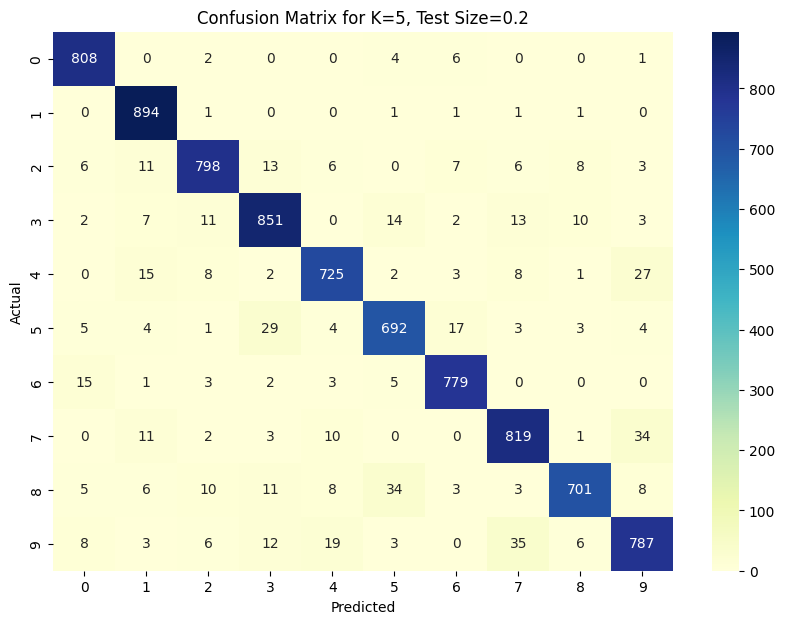

K: 6
Test-Split 0.2
Original Confusion Matrix String:
[[806   0   4   0   0   4   6   0   0   1]
 [  0 894   1   0   0   1   1   1   1   0]
 [  5  14 797  14   4   0   9   5   7   3]
 [  2   4  12 850   0  15   2  15  10   3]
 [  0  16   7   2 727   3   2   6   1  27]
 [  5   3   1  30   3 691  17   4   4   4]
 [ 18   1   4   2   3   5 774   0   1   0]
 [  0  14   3   3  11   0   0 819   1  29]
 [  6   7   7  13  11  38   2   2 692  11]
 [  9   5   6  11  25   4   0  40   5 774]]
Cleaned Confusion Matrix String:
[[806,0,4,0,0,4,6,0,0,1],[0,894,1,0,0,1,1,1,1,0],[5,14,797,14,4,0,9,5,7,3],[2,4,12,850,0,15,2,15,10,3],[0,16,7,2,727,3,2,6,1,27],[5,3,1,30,3,691,17,4,4,4],[18,1,4,2,3,5,774,0,1,0],[0,14,3,3,11,0,0,819,1,29],[6,7,7,13,11,38,2,2,692,11],[9,5,6,11,25,4,0,40,5,774]]


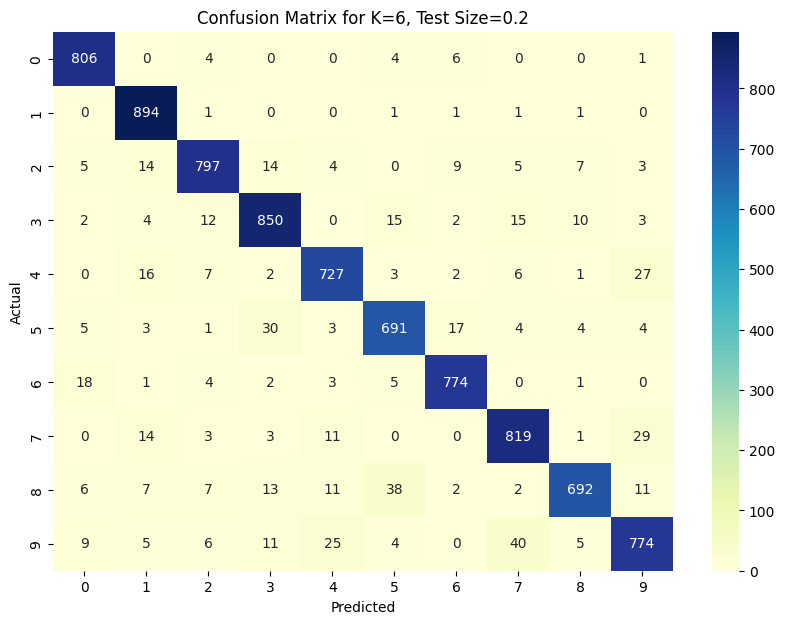

K: 7
Test-Split 0.2
Original Confusion Matrix String:
[[807   0   3   0   0   4   6   0   0   1]
 [  0 892   1   0   1   1   2   0   1   1]
 [  8  12 794  14   5   0   9   5   9   2]
 [  2   5  11 847   1  17   2  14  11   3]
 [  0  14   7   2 722   3   1   8   3  31]
 [  4   4   1  27   3 693  18   4   4   4]
 [ 15   1   3   2   3   4 779   0   1   0]
 [  0  13   1   3  11   0   0 814   1  37]
 [  6   6   9  12   9  41   4   3 690   9]
 [  8   5   6  11  20   4   0  33   6 786]]
Cleaned Confusion Matrix String:
[[807,0,3,0,0,4,6,0,0,1],[0,892,1,0,1,1,2,0,1,1],[8,12,794,14,5,0,9,5,9,2],[2,5,11,847,1,17,2,14,11,3],[0,14,7,2,722,3,1,8,3,31],[4,4,1,27,3,693,18,4,4,4],[15,1,3,2,3,4,779,0,1,0],[0,13,1,3,11,0,0,814,1,37],[6,6,9,12,9,41,4,3,690,9],[8,5,6,11,20,4,0,33,6,786]]


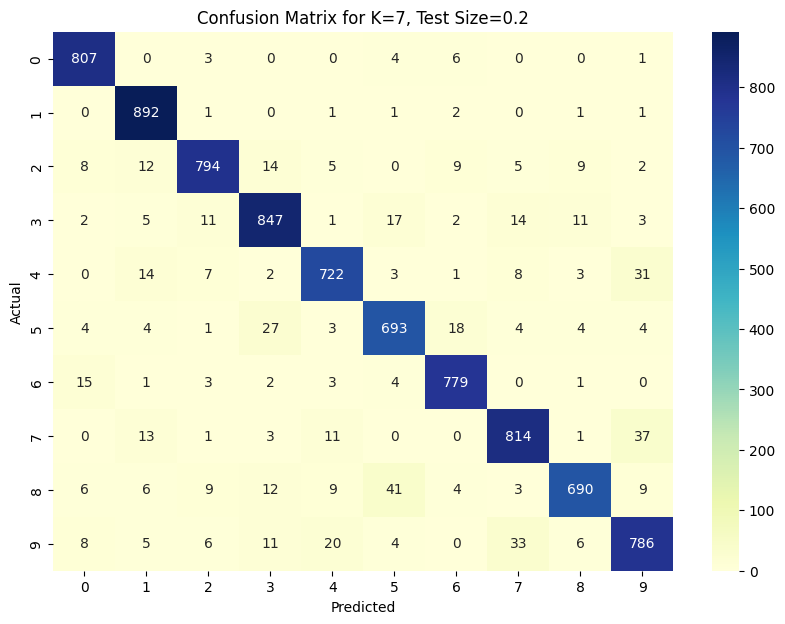

K: 10
Test-Split 0.2
Original Confusion Matrix String:
[[806   1   3   0   0   3   7   0   0   1]
 [  0 891   1   0   1   2   2   0   1   1]
 [  6  16 788  16   9   0   9   5   7   2]
 [  2   9  11 844   1  13   2  15  13   3]
 [  0  14   5   2 723   5   1   8   2  31]
 [  4   4   1  34   3 687  19   3   2   5]
 [ 15   1   4   1   3   7 776   0   1   0]
 [  0  17   2   3  10   0   0 809   1  38]
 [  7   9   8  14   9  40   3   3 685  11]
 [  8   6   5  12  23   4   0  43   6 772]]
Cleaned Confusion Matrix String:
[[806,1,3,0,0,3,7,0,0,1],[0,891,1,0,1,2,2,0,1,1],[6,16,788,16,9,0,9,5,7,2],[2,9,11,844,1,13,2,15,13,3],[0,14,5,2,723,5,1,8,2,31],[4,4,1,34,3,687,19,3,2,5],[15,1,4,1,3,7,776,0,1,0],[0,17,2,3,10,0,0,809,1,38],[7,9,8,14,9,40,3,3,685,11],[8,6,5,12,23,4,0,43,6,772]]


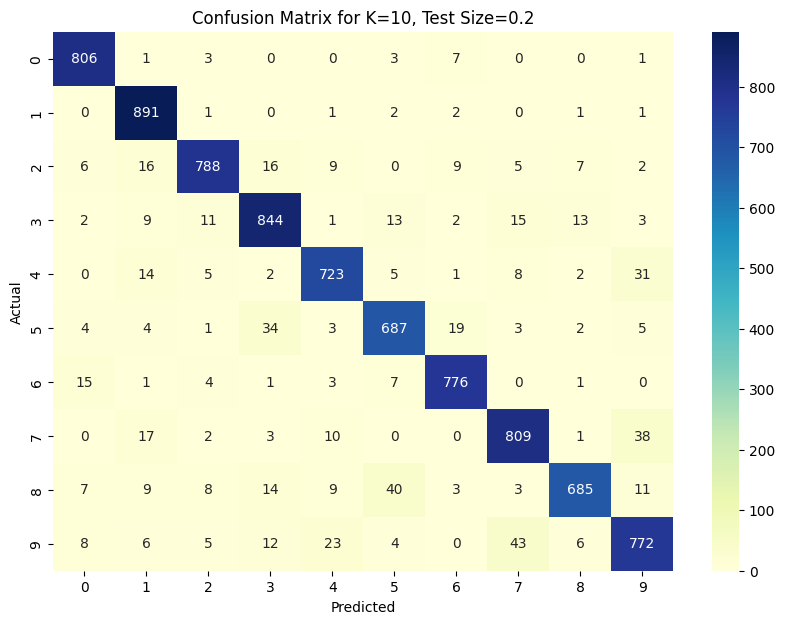

K: 2
Test-Split 0.1
Original Confusion Matrix String:
[[383   0   0   0   0   2   2   1   0   1]
 [  0 456   0   0   0   0   0   1   0   0]
 [  5   7 415   2   5   0   3   2   2   0]
 [  2   3  14 402   0   7   0   2   3   1]
 [  0   8   3   0 381   1   1   2   0  11]
 [  2   2   1  16   3 344   7   3   1   1]
 [ 14   0   3   1   2   4 404   0   0   0]
 [  0   6   3   2   6   1   0 396   0   7]
 [  8   2   2  15   7  24   1   3 344   3]
 [  2   3   2  10  27   3   0  28   4 355]]
Cleaned Confusion Matrix String:
[[383,0,0,0,0,2,2,1,0,1],[0,456,0,0,0,0,0,1,0,0],[5,7,415,2,5,0,3,2,2,0],[2,3,14,402,0,7,0,2,3,1],[0,8,3,0,381,1,1,2,0,11],[2,2,1,16,3,344,7,3,1,1],[14,0,3,1,2,4,404,0,0,0],[0,6,3,2,6,1,0,396,0,7],[8,2,2,15,7,24,1,3,344,3],[2,3,2,10,27,3,0,28,4,355]]


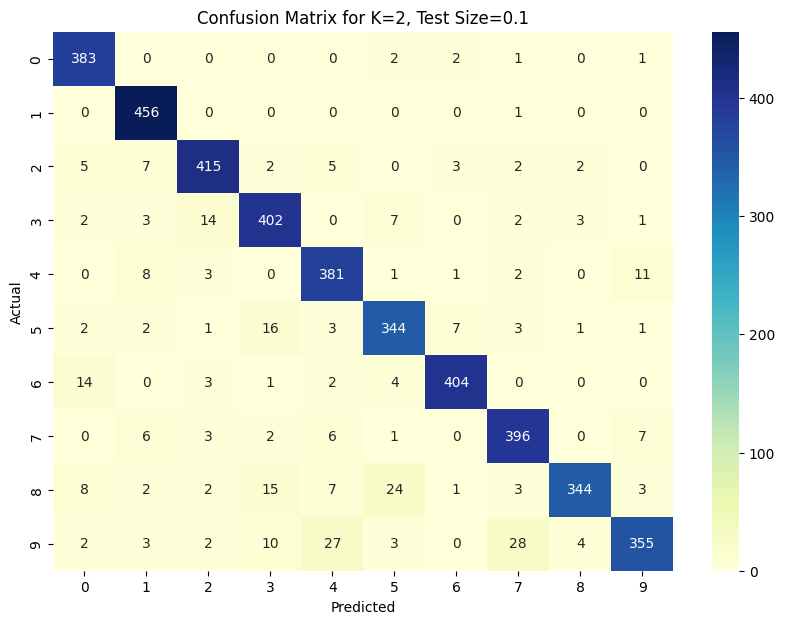

K: 4
Test-Split 0.1
Original Confusion Matrix String:
[[382   0   0   0   0   2   3   0   0   2]
 [  0 456   0   0   0   0   1   0   0   0]
 [  3   4 415   5   3   0   4   2   4   1]
 [  1   3   7 406   0   6   0   3   5   3]
 [  0   7   2   0 377   1   1   4   0  15]
 [  2   0   1  14   2 347   8   3   1   2]
 [ 11   0   2   2   1   4 408   0   0   0]
 [  0   4   1   1   7   0   0 397   0  11]
 [  4   2   2   6   6  15   1   2 367   4]
 [  2   2   2   9  15   2   0  22   3 377]]
Cleaned Confusion Matrix String:
[[382,0,0,0,0,2,3,0,0,2],[0,456,0,0,0,0,1,0,0,0],[3,4,415,5,3,0,4,2,4,1],[1,3,7,406,0,6,0,3,5,3],[0,7,2,0,377,1,1,4,0,15],[2,0,1,14,2,347,8,3,1,2],[11,0,2,2,1,4,408,0,0,0],[0,4,1,1,7,0,0,397,0,11],[4,2,2,6,6,15,1,2,367,4],[2,2,2,9,15,2,0,22,3,377]]


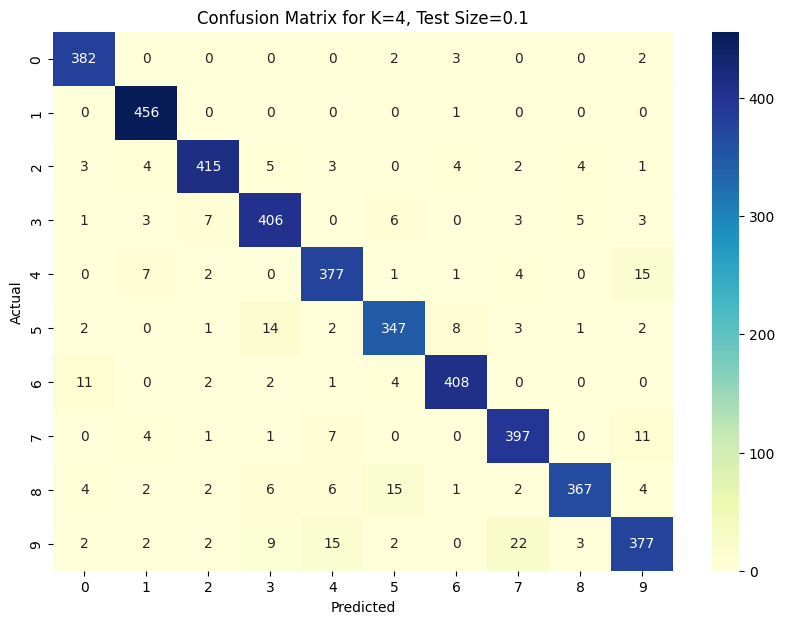

K: 5
Test-Split 0.1
Original Confusion Matrix String:
[[383   0   0   0   0   2   3   0   0   1]
 [  0 456   0   0   0   0   1   0   0   0]
 [  2   7 410   8   4   0   5   3   1   1]
 [  1   3   5 404   0   7   0   6   6   2]
 [  0   7   3   0 376   1   1   5   0  14]
 [  3   1   1  10   2 349   8   2   1   3]
 [  9   0   2   2   1   3 411   0   0   0]
 [  0   4   2   2   7   0   0 394   0  12]
 [  5   3   3   5   4  14   1   3 368   3]
 [  2   2   2   9  10   2   0  15   4 388]]
Cleaned Confusion Matrix String:
[[383,0,0,0,0,2,3,0,0,1],[0,456,0,0,0,0,1,0,0,0],[2,7,410,8,4,0,5,3,1,1],[1,3,5,404,0,7,0,6,6,2],[0,7,3,0,376,1,1,5,0,14],[3,1,1,10,2,349,8,2,1,3],[9,0,2,2,1,3,411,0,0,0],[0,4,2,2,7,0,0,394,0,12],[5,3,3,5,4,14,1,3,368,3],[2,2,2,9,10,2,0,15,4,388]]


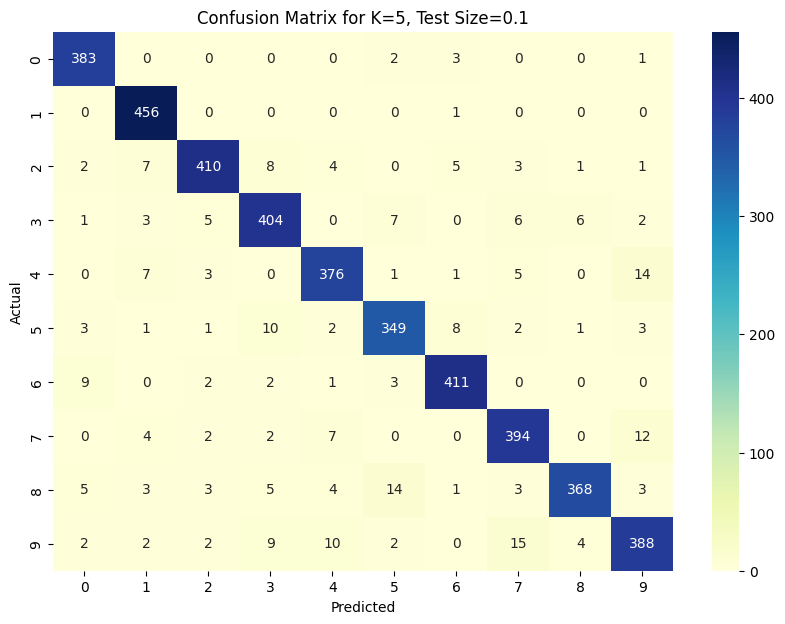

K: 6
Test-Split 0.1
Original Confusion Matrix String:
[[383   0   0   0   0   2   3   0   0   1]
 [  0 456   0   0   0   0   1   0   0   0]
 [  2   6 412   7   3   0   5   3   2   1]
 [  1   3   5 406   0   5   0   7   5   2]
 [  0   7   3   0 378   1   1   5   0  12]
 [  3   1   1  13   2 345   9   3   1   2]
 [ 12   0   1   2   1   3 409   0   0   0]
 [  0   6   2   2   6   0   0 395   0  10]
 [  7   2   2   5   4  16   2   3 364   4]
 [  2   2   2   7  12   2   0  20   4 383]]
Cleaned Confusion Matrix String:
[[383,0,0,0,0,2,3,0,0,1],[0,456,0,0,0,0,1,0,0,0],[2,6,412,7,3,0,5,3,2,1],[1,3,5,406,0,5,0,7,5,2],[0,7,3,0,378,1,1,5,0,12],[3,1,1,13,2,345,9,3,1,2],[12,0,1,2,1,3,409,0,0,0],[0,6,2,2,6,0,0,395,0,10],[7,2,2,5,4,16,2,3,364,4],[2,2,2,7,12,2,0,20,4,383]]


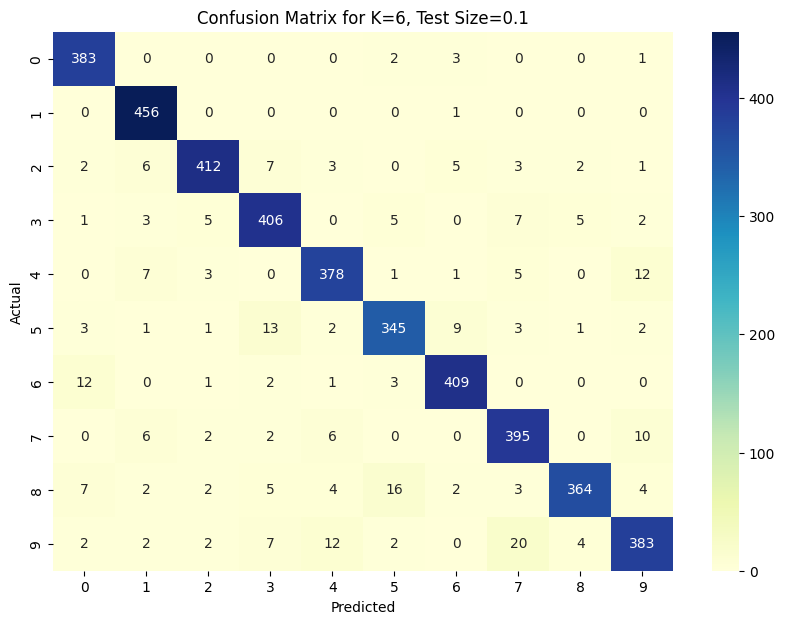

K: 7
Test-Split 0.1
Original Confusion Matrix String:
[[383   0   0   0   0   2   3   0   0   1]
 [  0 455   0   0   0   0   1   0   0   1]
 [  4   7 407   8   4   0   5   4   2   0]
 [  1   3   5 405   0   5   0   8   5   2]
 [  0   6   3   0 375   2   1   6   1  13]
 [  2   1   1  12   2 347   9   2   1   3]
 [ 10   0   2   1   1   3 411   0   0   0]
 [  0   5   0   2   7   0   0 397   0  10]
 [  6   2   2   5   4  18   2   2 362   6]
 [  2   3   2   8   8   3   0  18   3 387]]
Cleaned Confusion Matrix String:
[[383,0,0,0,0,2,3,0,0,1],[0,455,0,0,0,0,1,0,0,1],[4,7,407,8,4,0,5,4,2,0],[1,3,5,405,0,5,0,8,5,2],[0,6,3,0,375,2,1,6,1,13],[2,1,1,12,2,347,9,2,1,3],[10,0,2,1,1,3,411,0,0,0],[0,5,0,2,7,0,0,397,0,10],[6,2,2,5,4,18,2,2,362,6],[2,3,2,8,8,3,0,18,3,387]]


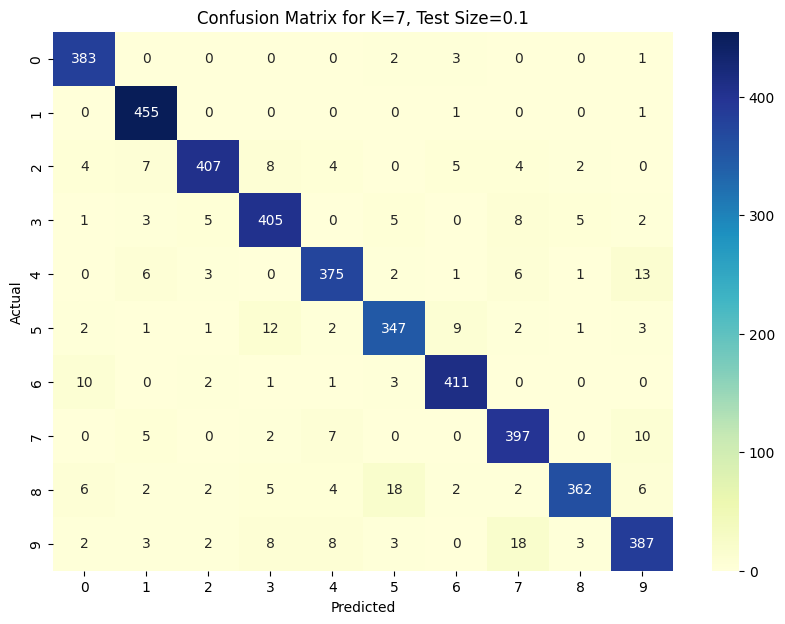

K: 10
Test-Split 0.1
Original Confusion Matrix String:
[[382   0   0   0   0   2   4   0   0   1]
 [  0 454   0   0   0   1   1   0   0   1]
 [  3   8 404  10   5   0   6   3   2   0]
 [  1   5   5 402   0   7   0   7   4   3]
 [  0   7   2   0 375   3   1   4   1  14]
 [  2   1   1  14   2 346  10   3   0   1]
 [ 11   0   2   1   1   2 410   0   1   0]
 [  0   7   1   2   8   0   0 388   0  15]
 [  6   3   1   6   5  18   2   2 357   9]
 [  2   3   1   7  11   2   0  19   5 384]]
Cleaned Confusion Matrix String:
[[382,0,0,0,0,2,4,0,0,1],[0,454,0,0,0,1,1,0,0,1],[3,8,404,10,5,0,6,3,2,0],[1,5,5,402,0,7,0,7,4,3],[0,7,2,0,375,3,1,4,1,14],[2,1,1,14,2,346,10,3,0,1],[11,0,2,1,1,2,410,0,1,0],[0,7,1,2,8,0,0,388,0,15],[6,3,1,6,5,18,2,2,357,9],[2,3,1,7,11,2,0,19,5,384]]


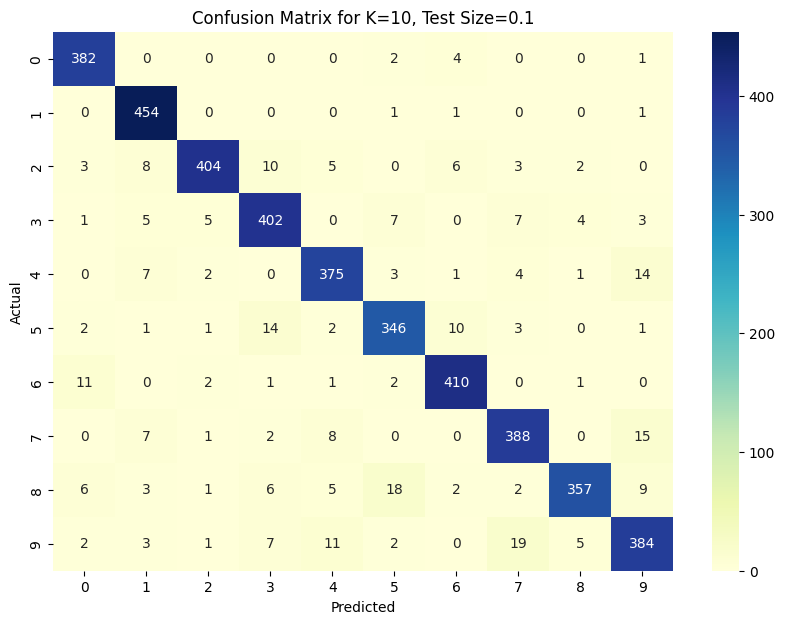

K: 2
Test-Split 0.05
Original Confusion Matrix String:
[[208   0   0   0   0   0   1   0   0   1]
 [  0 215   0   0   0   0   0   0   0   0]
 [  3   1 200   0   2   0   3   1   1   0]
 [  1   2   8 199   0   4   0   0   1   0]
 [  0   2   0   0 181   1   1   1   0   4]
 [  1   1   1   8   2 179   6   2   1   0]
 [  7   0   2   1   1   2 199   0   0   0]
 [  0   4   2   2   4   1   0 207   0   2]
 [  3   1   2  10   3  13   1   1 188   1]
 [  1   2   0   7  13   3   0  14   2 159]]
Cleaned Confusion Matrix String:
[[208,0,0,0,0,0,1,0,0,1],[0,215,0,0,0,0,0,0,0,0],[3,1,200,0,2,0,3,1,1,0],[1,2,8,199,0,4,0,0,1,0],[0,2,0,0,181,1,1,1,0,4],[1,1,1,8,2,179,6,2,1,0],[7,0,2,1,1,2,199,0,0,0],[0,4,2,2,4,1,0,207,0,2],[3,1,2,10,3,13,1,1,188,1],[1,2,0,7,13,3,0,14,2,159]]


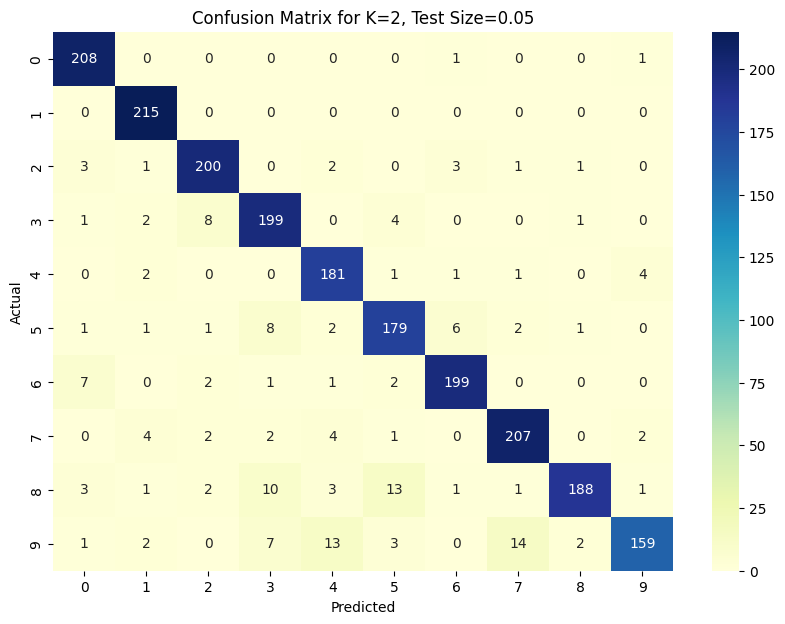

K: 4
Test-Split 0.05
Original Confusion Matrix String:
[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  2   2 201   0   1   0   2   1   1   1]
 [  1   2   5 199   0   4   0   1   1   2]
 [  0   2   0   0 180   1   1   1   0   5]
 [  1   1   1   8   1 179   6   2   1   1]
 [  6   0   0   2   1   1 202   0   0   0]
 [  0   3   1   1   6   0   0 205   0   6]
 [  3   0   2   4   2  11   0   1 198   2]
 [  1   2   0   5   7   1   0  10   2 173]]
Cleaned Confusion Matrix String:
[[207,0,0,0,0,0,2,0,0,1],[0,214,0,0,0,0,1,0,0,0],[2,2,201,0,1,0,2,1,1,1],[1,2,5,199,0,4,0,1,1,2],[0,2,0,0,180,1,1,1,0,5],[1,1,1,8,1,179,6,2,1,1],[6,0,0,2,1,1,202,0,0,0],[0,3,1,1,6,0,0,205,0,6],[3,0,2,4,2,11,0,1,198,2],[1,2,0,5,7,1,0,10,2,173]]


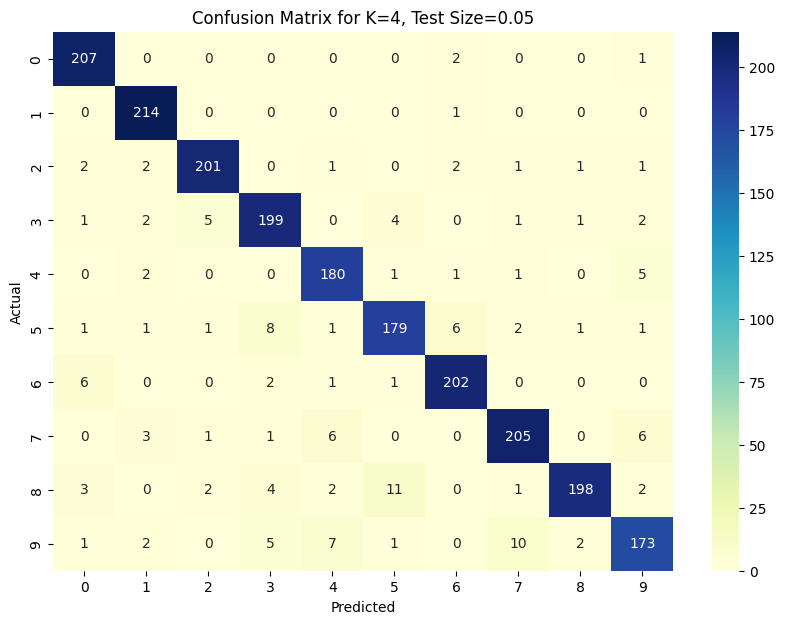

K: 5
Test-Split 0.05
Original Confusion Matrix String:
[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  1   3 200   2   2   0   2   1   0   0]
 [  1   1   3 201   0   4   0   3   1   1]
 [  0   1   0   0 179   1   1   1   0   7]
 [  2   1   1   5   2 180   6   1   1   2]
 [  6   0   1   2   1   1 201   0   0   0]
 [  0   3   2   2   5   0   0 202   0   8]
 [  2   1   3   3   2  11   0   1 198   2]
 [  1   2   0   5   6   2   0   6   2 177]]
Cleaned Confusion Matrix String:
[[207,0,0,0,0,0,2,0,0,1],[0,214,0,0,0,0,1,0,0,0],[1,3,200,2,2,0,2,1,0,0],[1,1,3,201,0,4,0,3,1,1],[0,1,0,0,179,1,1,1,0,7],[2,1,1,5,2,180,6,1,1,2],[6,0,1,2,1,1,201,0,0,0],[0,3,2,2,5,0,0,202,0,8],[2,1,3,3,2,11,0,1,198,2],[1,2,0,5,6,2,0,6,2,177]]


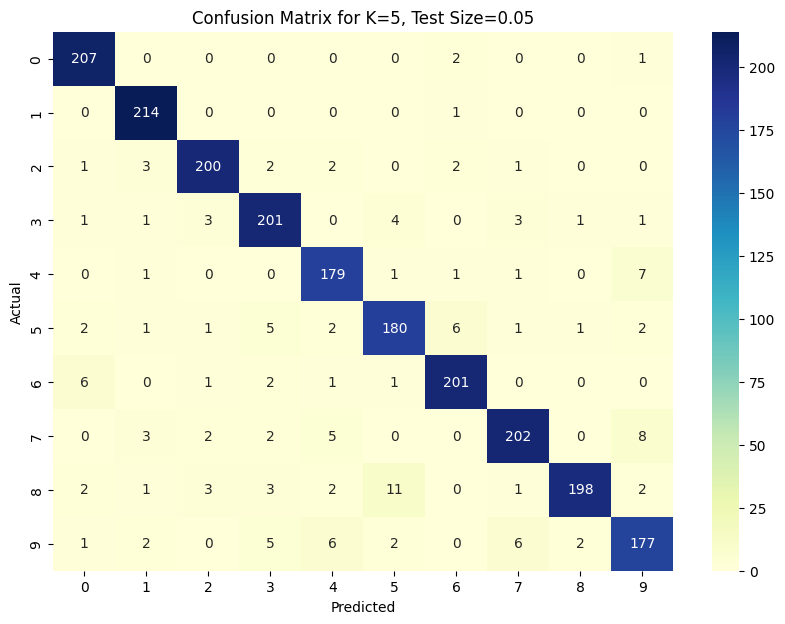

K: 6
Test-Split 0.05
Original Confusion Matrix String:
[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  2   2 200   0   1   0   3   1   1   1]
 [  1   2   3 199   0   4   0   4   1   1]
 [  0   1   0   0 181   1   1   1   0   5]
 [  2   1   1   7   2 177   7   2   1   1]
 [  6   0   0   2   1   1 202   0   0   0]
 [  0   4   2   2   4   0   0 204   0   6]
 [  3   0   2   3   2  13   1   1 196   2]
 [  1   2   0   5   6   2   0   9   2 174]]
Cleaned Confusion Matrix String:
[[207,0,0,0,0,0,2,0,0,1],[0,214,0,0,0,0,1,0,0,0],[2,2,200,0,1,0,3,1,1,1],[1,2,3,199,0,4,0,4,1,1],[0,1,0,0,181,1,1,1,0,5],[2,1,1,7,2,177,7,2,1,1],[6,0,0,2,1,1,202,0,0,0],[0,4,2,2,4,0,0,204,0,6],[3,0,2,3,2,13,1,1,196,2],[1,2,0,5,6,2,0,9,2,174]]


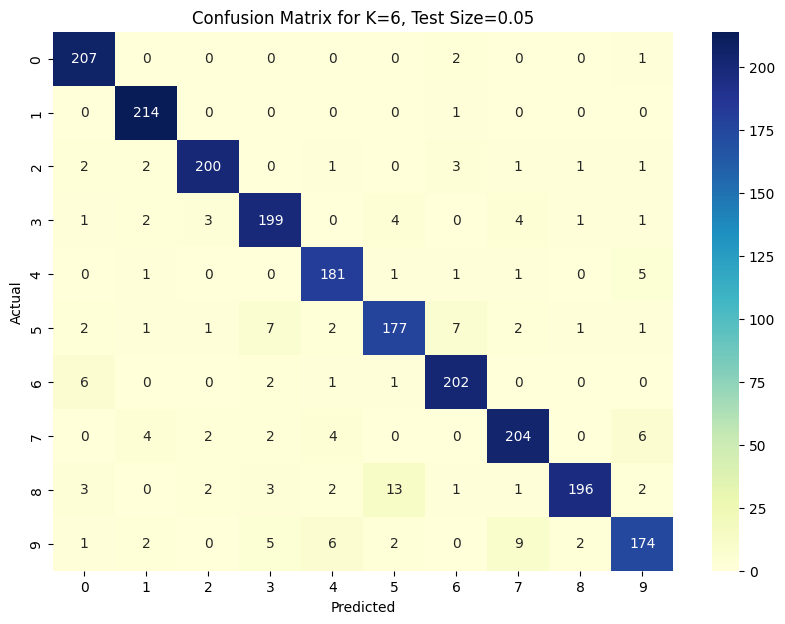

K: 7
Test-Split 0.05
Original Confusion Matrix String:
[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  3   3 197   1   2   0   3   2   0   0]
 [  1   2   3 198   0   4   0   5   1   1]
 [  0   0   0   0 182   1   1   1   0   5]
 [  1   1   1   7   2 178   7   1   1   2]
 [  6   0   1   1   1   1 202   0   0   0]
 [  0   4   0   2   6   0   0 205   0   5]
 [  3   1   2   3   3  11   0   1 197   2]
 [  1   2   0   6   5   2   0   7   2 176]]
Cleaned Confusion Matrix String:
[[207,0,0,0,0,0,2,0,0,1],[0,214,0,0,0,0,1,0,0,0],[3,3,197,1,2,0,3,2,0,0],[1,2,3,198,0,4,0,5,1,1],[0,0,0,0,182,1,1,1,0,5],[1,1,1,7,2,178,7,1,1,2],[6,0,1,1,1,1,202,0,0,0],[0,4,0,2,6,0,0,205,0,5],[3,1,2,3,3,11,0,1,197,2],[1,2,0,6,5,2,0,7,2,176]]


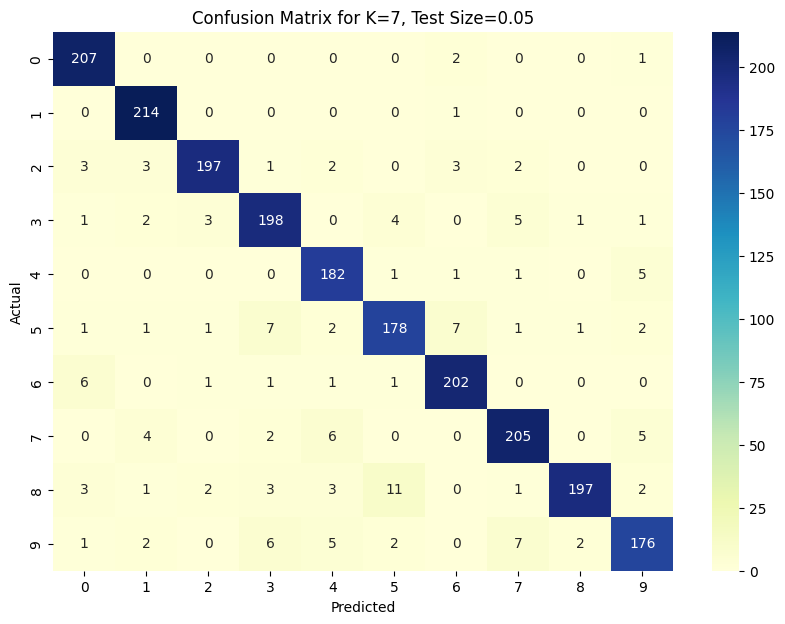

K: 10
Test-Split 0.05
Original Confusion Matrix String:
[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  2   3 199   0   2   0   4   1   0   0]
 [  1   2   4 199   0   3   0   4   1   1]
 [  0   1   0   0 179   2   1   1   0   6]
 [  1   1   1   8   2 177   7   2   0   2]
 [  7   0   1   1   1   1 201   0   0   0]
 [  0   5   1   2   7   0   0 201   0   6]
 [  1   1   1   4   2  15   0   1 194   4]
 [  1   2   0   5   5   2   0   8   3 175]]
Cleaned Confusion Matrix String:
[[207,0,0,0,0,0,2,0,0,1],[0,214,0,0,0,0,1,0,0,0],[2,3,199,0,2,0,4,1,0,0],[1,2,4,199,0,3,0,4,1,1],[0,1,0,0,179,2,1,1,0,6],[1,1,1,8,2,177,7,2,0,2],[7,0,1,1,1,1,201,0,0,0],[0,5,1,2,7,0,0,201,0,6],[1,1,1,4,2,15,0,1,194,4],[1,2,0,5,5,2,0,8,3,175]]


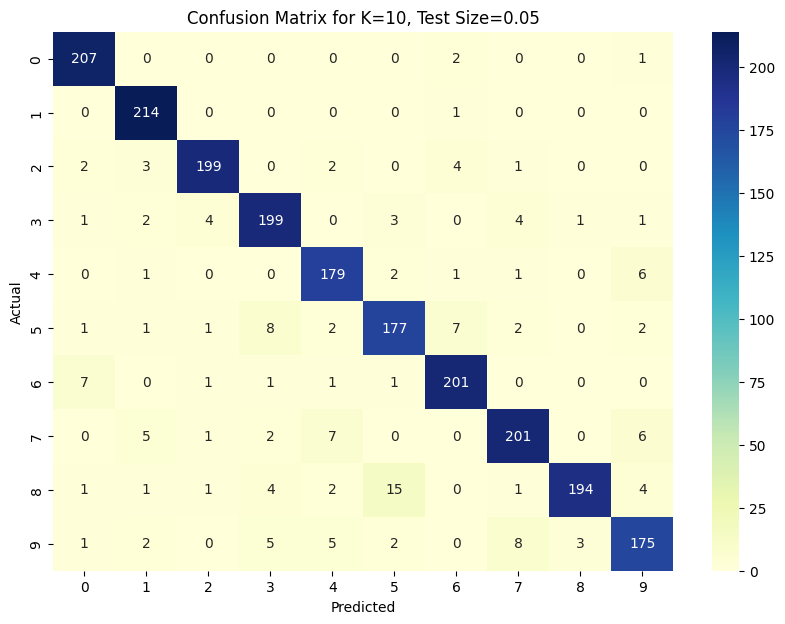

In [33]:
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for test_size in test_sizes:
    for k in k_values:
        
        print('K:',k)
        print('Test-Split',test_size)
        # Choose a specific scenario for detailed confusion matrix analysis
        specific_scenario = results_df[(results_df['K'] == k) & (results_df['Test_Size'] == test_size)].iloc[0]

        # Original Confusion Matrix String
        conf_matrix_str = specific_scenario['Confusion_Matrix']
        print("Original Confusion Matrix String:")
        print(conf_matrix_str)

        # Step 1: Remove extra spaces
        conf_matrix_str_cleaned = " ".join(conf_matrix_str.split())

        # Step 2: Replace spaces within brackets with commas
        conf_matrix_str_cleaned = conf_matrix_str_cleaned.replace('] [', '],[')
        conf_matrix_str_cleaned = conf_matrix_str_cleaned.replace(' ', ',')
        conf_matrix_str_cleaned = conf_matrix_str_cleaned.replace('[,', '[').replace(',]', ']')

        # Print cleaned string
        print("Cleaned Confusion Matrix String:")
        print(conf_matrix_str_cleaned)

        # Step 3: Convert string representation of confusion matrix to list
        try:
            conf_matrix = ast.literal_eval(conf_matrix_str_cleaned)
        except (SyntaxError, ValueError) as e:
            print("Error parsing confusion matrix string:", e)
            # Handle error or fix the string format further

        # Convert the list to a numpy array
        conf_matrix = np.array(conf_matrix)

        # Plot the confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
        
        plt.title(f'Confusion Matrix for K={k}, Test Size={test_size}')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


# Step 10: Find Best Case 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Read the results CSV file
results_df = pd.read_csv("knn_evaluation_results.csv")

# Step 3: Identify the scenario with the maximum accuracy
max_accuracy_scenario = results_df.loc[results_df['Accuracy'].idxmax()]

# Step 4: Retrieve `k` and `test size` values
best_k = max_accuracy_scenario['K']
best_test_size = max_accuracy_scenario['Test_Size']

# Print the best K and Test Size
print(f"Best K: {best_k}, Best Test Size: {best_test_size}")

# Step 5: Load the data and split into train and test sets
data_df = pd.read_csv("data.csv")
test_df = pd.read_csv("test.csv")

y = data_df['label']
X = data_df.drop('label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size, random_state=40)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
x_for_test_data = scaler.transform(test_df)

# Step 6: Train the KNN model using the best `k` value
classifier = KNeighborsClassifier(n_neighbors=int(best_k))
classifier.fit(X_train, y_train)

# Predict the test data using the trained model
y_pred_on_test_data = classifier.predict(x_for_test_data)

# Print the predictions
print("Predictions on test data:", y_pred_on_test_data)

# Optionally, you can evaluate the model on the X_test data to verify performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = classifier.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Best K: 5, Best Test Size: 0.1
Predictions on test data: [2 0 9 ... 3 9 2]
Accuracy on test set: 0.9378571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       389
           1       0.94      1.00      0.97       457
           2       0.96      0.93      0.94       441
           3       0.92      0.93      0.92       434
           4       0.93      0.92      0.93       407
           5       0.92      0.92      0.92       380
           6       0.96      0.96      0.96       428
           7       0.92      0.94      0.93       421
           8       0.97      0.90      0.93       409
           9       0.92      0.89      0.90       434

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200

Confusion Matrix:
 [[383   0   0   0   0   2   3   0   0   1]
 [  0 456   0   0   0   0   1   0   0  